# Import data

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

def pr(*a):
    print(*a)

#comments = pd.read_csv("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_set.csv") # WITH TEXT FEATURES
#comments.to_pickle("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_set2.pkl")
#comments.tail()

Mounted at /content/gdrive


In [ ]:
gme_set = pd.read_pickle("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/gme_comment_only_set.pkl")
gme_set.head() #len=177393 before, now 94506

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores,depth_children,virality,op_date,overall_visibility,three_day_visibility,depth,oc_score,spread_score
87,87,87,87,87,Every absolute retard post I read just makes m...,gi62utt,Storiaron,t2_alvvojv,t1_gi3t9i6,2021-01-05T10:46:24,/r/wallstreetbets/comments/kqcwdo/gamestops_gr...,1609843584,1,False,t3_kqcwdo,True,/r/wallstreetbets/comments/kqcwdo/gamestops_gr...,False,{},[],0,True,NaN,just me more for my even know which a the the ...,Every absolute retard post I read just make me...,Every absolute retard post I read makes scared...,DT NN NN NN PRP VBD RB VBZ PRP JJR JJ IN PRP$ ...,27.000000,4.037037,read makes dont know gave tell are become hold,just even norway,more scared worse bad gamestop,NaN,NaN,0.0,0.0,0.144987,0,0.000000,NaN,NaN,NaN,0,1,1.330693
100,100,100,100,100,DD for GME:\n\nIf you look at the GME graph at...,gi62ww9,mickeyc0207,t2_63v5ss9y,t3_kqhtg5,2021-01-05T10:47:24,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843644,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,for you at the at it of for,DD for GME : If you look at the GME graph at m...,"DD GME : If look GME graph marketinsider , loo...","NNP IN NNP : IN PRP VBP IN DT NNP NN IN NN , P...",30.000000,3.533333,look looks Take,*over,NaN,NaN,NaN,0.0,0.0,0.113713,0,0.000000,NaN,NaN,NaN,0,1,1.330693
105,105,105,105,105,"was at the mall with my gf and her lil bro, he...",gi62xvp,imsilver4fukyou,t2_kdow9,t3_kqhtg5,2021-01-05T10:47:53,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843673,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,was at the with my and her he to see what was ...,"be at the mall with my gf and her lil bro , he...","mall gf lil bro , wanted store closing/sell ot...","VBD IN DT NN IN PRP$ NN CC PRP$ NN NN , PRP VB...",32.666667,3.693878,was wanted see was had digging had wait didnt ...,just too,othe retractable tight couldnt,NaN,NaN,1.0,2.0,0.199053,2,1.333333,NaN,NaN,NaN,0,1,4.028588
157,157,157,157,157,All the momentum and volume in EV and you tard...,gi638qv,btoned,t2_4pzgbn,t3_kqhtg5,2021-01-05T10:52:58,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843978,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,True,NaN,the and in and you are still about,All the momentum and volume in EV and you tard...,All momentum volume EV tards tapping GME . 😂😂😂,PDT DT NN CC NN IN NNP CC PRP NNS VBP RB VBG I...,8.500000,3.823529,are tapping,still,NaN,NaN,NaN,0.0,0.0,0.023480,0,0.000000,NaN,NaN,NaN,0,1,1.330693
195,195,195,195,195,Imagine bagholding GME and PLTR after the dump...,gi63eae,raobjcovtn,t2_2srwp75a,t3_kqhtg5,2021-01-05T10:55:34,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609844134,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,True,NaN,and after the man are some,Imagine bagholding GME and PLTR after the dump...,Imagine bagholding GME PLTR dump 😂😂😂 y'all clowns,NNP VBG NNP CC NNP IN DT NN NNP NN NN VBP DT NNS,14.000000,4.500000,bagholding are,NaN,NaN,NaN,NaN,2.0,11.0,0.076174,7,3.484848,NaN,NaN,NaN,0,1,8.382009


In [ ]:
amc_set = pd.read_pickle("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/amc_comment_only_set.pkl")
amc_set.head() #37993

,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children
916,"Perhaps, but I can think of 1 Arab state that ...",gi66bvp,Dan_inKuwait,t2_12lizrk3,t1_gi65zyk,NaN,NaN,1609846969,1,False,t3_kqu2fo,True,/r/wallstreetbets/comments/kqu2fo/get_on_the_r...,False,{},[],0,True,NaN,but can of that is even its now and was just t...,"Perhaps , but I can think of 1 Arab state that...","Perhaps , I think 1 Arab state n't making dail...","RB , CC PRP MD VB IN CD JJ NN WDT VBZ RB RB VB...",16.8,3.976190,think is making *needs* increased was trying s...,Perhaps n't even right now Also n't just very ...,Arab daily bearish next couple following all-in,NaN,NaN,0.0,0.0
1711,Can we make AMC the new GME?,gi69553,OverOverAndAway,t2_30dygibd,t3_kqw962,NaN,NaN,1609849486,1,False,t3_kqw962,True,/r/wallstreetbets/comments/kqw962/daily_discus...,False,{},[],0,False,NaN,we make the,Can we make AMC the new GME ?,Can AMC new GME ?,MD PRP VB NNP DT JJ NNP .,8.0,2.750000,make,,new,NaN,NaN,1.0,4.0
9558,AMC?,gi6quh6,SnooCauliflowers4796,t2_7ybvwiyv,t3_kqw962,NaN,NaN,1609860521,0,False,t3_kqw962,True,/r/wallstreetbets/comments/kqw962/daily_discus...,False,{},[],0,False,NaN,,AMC ?,AMC ?,NNP .,2.0,2.000000,,,,NaN,NaN,0.0,0.0
18133,I’m gonna grab a bunch of may 8$ calls for amc...,gi7dj1x,chewks,t2_byn9y,t3_kqw962,NaN,NaN,1609870949,2,False,t3_kqw962,True,/r/wallstreetbets/comments/kqw962/daily_discus...,False,{},[],0,False,NaN,a of may for know you for this but it and take...,I ’ m gon na grab a bunch of may 8 $ call for ...,I ’ m gon na grab bunch 8 $ calls amc . Prob g...,PRP VBP JJ NN TO VB DT NN IN MD CD $ NNS IN NN...,16.0,2.645833,’ grab know think ’ retarded ’ take tendie,m,m guys s,NaN,NaN,0.0,0.0
21763,amc under 2$ time to buy?,gi7msrn,chewks,t2_byn9y,t3_kmk1f7,NaN,NaN,1609875044,1,False,t3_kmk1f7,True,/r/wallstreetbets/comments/kmk1f7/disney_and_a...,False,{},[],0,False,NaN,under to,amc under 2 $ time to buy ?,amc 2 $ time buy ?,NN IN CD $ NN TO VB .,8.0,2.500000,buy,,,NaN,NaN,1.0,4.0


In [ ]:
submissions = pd.read_pickle("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_submission_set.pkl")
submissions.head()

,title,selftext,id,author,author_fullname,posted_on,num_comments,score,full_link,no_follow,permalink,domain,stickied,gildings,upvote_ratio,all_awardings,total_awards_received,author_premium,is_crosspostable,is_original_content,is_video,link_flair_text,num_crossposts,removed_by_category,url_overridden_by_dest,media,created_utc,banned_by,distinguished
0,$GME Rocket ship today 🚀🚀🚀🚀🚀,,kr6og1,WOTEugene,t2_p18nh,2021-01-05T20:14:08,63,1,https://www.reddit.com/r/wallstreetbets/commen...,True,/r/wallstreetbets/comments/kr6og1/gme_rocket_s...,i.redd.it,False,{},1.0,[],0,False,True,False,False,Meme,0,NaN,https://i.redd.it/jrj5kv75nk961.gif,NaN,1609877648,NaN,False
1,ACB got that sweet Sativa Brekky DD,ACB Sativa Indica —- Here’s my DD whether you ...,kr6og5,BlueLoke,t2_3vg24gmz,2021-01-05T20:14:08,2,1,https://www.reddit.com/r/wallstreetbets/commen...,True,/r/wallstreetbets/comments/kr6og5/acb_got_that...,self.wallstreetbets,False,{},1.0,[],0,False,True,False,False,DD,0,NaN,NaN,NaN,1609877648,NaN,False
2,Anyone still holding onto their 1/15 call?,[removed],kr6p7w,Jwakester,t2_16gfgd,2021-01-05T20:15:05,0,1,https://www.reddit.com/r/wallstreetbets/commen...,True,/r/wallstreetbets/comments/kr6p7w/anyone_still...,self.wallstreetbets,False,{},1.0,[],0,False,False,False,False,Discussion,0,moderator,NaN,NaN,1609877705,NaN,False
3,Romeo Power (RMO) receives positive media cove...,"""Why Romeo Power Stock Is Higher Today | The M...",kr6q2k,S21197,t2_4gxr1xil,2021-01-05T20:16:11,1,1,https://www.reddit.com/r/wallstreetbets/commen...,False,/r/wallstreetbets/comments/kr6q2k/romeo_power_...,self.wallstreetbets,False,{},1.0,[],0,False,True,False,False,News,0,NaN,NaN,NaN,1609877771,NaN,False
4,QS Quantumscape I know most of you like buying...,,kr6qiw,Extracrispytendies,t2_9352rjcp,2021-01-05T20:16:45,31,1,https://www.reddit.com/r/wallstreetbets/commen...,True,/r/wallstreetbets/comments/kr6qiw/qs_quantumsc...,i.redd.it,False,{},1.0,[],0,False,True,False,False,Chart,0,NaN,https://i.redd.it/nsymsmhqnk961.jpg,NaN,1609877805,NaN,False


In [ ]:
import ast
with open('/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/thread_dict_better.txt', 'r') as loader:
    thread_dict = loader.read()
thread_dict = ast.literal_eval(thread_dict)
def comment_tree_getter(com_id, print_mode=True): # from 11/01
    for post in thread_dict.keys():
        postr = str(thread_dict[post])
        if com_id in postr:
            match = postr.find(com_id)
            start = match + 10
            rest = postr[start:]
            brackopen = False
            brackcheck = 0
            for i, l in enumerate(rest):
                if l == '{':
                    brackcheck += 1
                    brackopen = True
                elif l == '}':
                    brackcheck -= 1
                if brackopen and brackcheck == 0:
                    end = i + 1
                    break
            thread = postr[start:start + end]
            if print_mode:
                return 'post:', post, 'full thread:', thread_dict[post], 'children of comment:', ast.literal_eval(thread), 'amount of children:', thread.count(':')
            else:
                return post, thread_dict[post], ast.literal_eval(thread), thread.count(':')
    if print_mode:
        return 'not in dictionary'

comment_tree_getter('giy6cr3')

('post:',
 'kvbz8z',
 'full thread:',
 {'gj18i82': {'gj18n4k': {'gj1rp8f': {}}},
  'gj0fvww': {},
  'gizyglh': {'gj05qpy': {'gj5crus': {}}},
  'gizm19k': {'gizm8yf': {'gizmtok': {}, 'giznvz3': {}}},
  'gizlonn': {},
  'gizllrv': {},
  'gizll1z': {},
  'gizlh8m': {'gizlibz': {'gizln5e': {}, 'gizlnkt': {}}, 'gizlmxl': {}},
  'gizkoie': {},
  'gizkhq0': {},
  'gizkd5v': {'gizkezq': {}},
  'gizkd09': {'gizkeac': {}},
  'gizkbhc': {'gizkcy6': {}},
  'gizkb5h': {},
  'gizi49p': {},
  'gizhmya': {},
  'gizgsn2': {'gizh1ie': {'gizi0gk': {'gizipkq': {}}}},
  'gizgebf': {},
  'gizfs36': {'gizg253': {}},
  'gizfhy9': {},
  'gizeq9e': {},
  'gizenv5': {'gizev27': {}, 'gizf138': {}},
  'gizeklo': {'gizetb1': {}},
  'gizejpb': {'gizenr4': {}},
  'gizdzuh': {},
  'gizdhxg': {'gizdvav': {'gize5dd': {}}},
  'gizd6uy': {},
  'gizaecl': {},
  'giz9mcj': {},
  'giz9agx': {},
  'giz80gb': {},
  'giz7cx4': {'giz7gd7': {'giz7ynj': {}}, 'giz7nd4': {}},
  'giz79ew': {},
  'giz6w9f': {},
  'giz6tfb': {},
  'giz

# TFIDF prediction testing

In [ ]:
tfidf = TfidfVectorizer(stop_words=stop_words.union(['gme', 'gamestop', 'game_stop']), max_features=1000)
gme_vecs = tfidf.fit_transform(list(gme_set['body']))
pr(tfidf.vocabulary_)
pr(str(gme_vecs)[:500])
gme_scores = []
bodvecs = tfidf.transform(less_coms['body'])
vec = tfidf.transform([' '.join(list(gme_set['body']))])
for bodvec in bodvecs:
    score = 0
    gme_scores.append(np.dot(bodvec, vec.T))
    #for vec in gme_vecs:
    #    score += np.dot(bodvec, vec.T)
    #gme_scores.append(score)

{'retard': 737, 'post': 684, 'read': 718, 'makes': 554, 'scared': 770, 'investment': 485, 'dont': 279, 'gave': 383, 'today': 898, 'idea': 460, 'tell': 869, 'sec': 772, 'shorts': 796, 'bad': 109, '10': 3, 'hold': 441, 'world': 976, 'dd': 255, 'look': 537, 'looks': 540, 'like': 519, 'half': 412, 'profit': 700, 'bro': 159, 'wanted': 948, 'store': 841, 'closing': 204, 'sell': 777, 'games': 379, 'wait': 942, 'till': 891, 'didnt': 269, 'buy': 174, 'left': 512, 'spent': 819, 'damn': 250, 'saying': 768, 'dude': 289, 'pull': 704, 'yall': 990, 'bought': 151, 'calls': 179, 'momentum': 589, 'volume': 939, 'ev': 310, 'tards': 864, 'imagine': 466, 'pltr': 670, 'dump': 291, 'stay': 832, 'gang': 382, 'waiting': 943, 'selling': 779, 'puts': 710, 'actually': 70, 'pretty': 694, 'safe': 761, 'forced': 353, 'shares': 787, 'sale': 763, 'price': 695, 'obviously': 621, 'squeeze': 824, 'happens': 420, 'extra': 325, 'money': 591, 'feels': 337, 'massive': 563, 'bullish': 168, 'day': 253, 'think': 882, 'ryan': 75

In [ ]:
for i in gme_scores[:50]:
    pr(i[0,0])
less_coms['gme_scores'] = [i[0,0] for i in gme_scores]
less_coms.to_csv("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_set_small.csv")
less_coms.head(50)

0.07692771585260569
0.0
0.11315669250188837
0.04133104821141023
0.12171549128273203
0.0
0.09491805858931725
0.08603954618609222
0.013727236768434127
0.19720102759690264
0.1613731842674001
0.05443535954582007
0.01835053918631484
0.052362777001539476
0.1885219444980044
0.04474865751724905
0.010317680307548474
0.0
0.0
0.013682618880525233
0.0
0.054154863588380536
0.030467082711518306
0.09434976269285332
0.03427981498542257
0.023867488659546222
0.06579548150308138
0.02493635189972148
0.14984557391290343
0.041275035916036096
0.07921226513932748
0.15734236388913703
0.10225206435366242
0.1043069781799501
0.0
0.07784395015256829
0.09328722003598688
0.04430017366735604
0.04816396736914101
0.09679183144088162
0.019977980537961963
0.09935536075264084
0.08366682291519173
0.0721284548515904
0.009023276147667925
0.017961089183130514
0.08285459344481147
0.03623872402587198
0.14453317458786222
0.186509221482903


,Unnamed: 0,Unnamed: 0.1,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores,depth_children,virality,op_date,overall_visibility,three_day_visibility,depth,oc_score
0,0,0,Experience says youth and Dems sit home for mi...,gi62f4a,PaxAmericana2,t2_3lbdczdr,t1_gi626v6,2021-01-05T10:38:58,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843138,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,and for and that why and for are for that is t...,Experience say youth and Dems sit home for mid...,Experience says youth Dems sit home midterms s...,NN VBZ NN CC NNP VBP NN IN NNS CC NNS RB : DT ...,25.000000,4.600000,says sit 's are reserved says is expect,normally around,general fucky unexpected,NaN,NaN,1.0,4.0,0.076928,4,2.000000,NaN,NaN,NaN,0,1
1,1,1,Pennystock.,gi62fil,000Kurpitsa000,t2_1z85h5uc,t1_gi61358,2021-01-05T10:39:10,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843150,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,True,NaN,NaN,Pennystock .,Pennystock .,NNP .,2.000000,5.500000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0,0.000000,NaN,NaN,NaN,0,1
2,2,2,Bought GLD calls for option #2. Gold will see ...,gi62fnw,Chitownfico,t2_opfs9lz,t1_gi626v6,2021-01-05T10:39:15,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843155,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,for will see than of if already the have and w...,Bought GLD call for option # 2 . Gold will see...,Bought GLD calls option # 2 . Gold highs highe...,NNP NNP VBZ IN NN # CD . NN MD VB NNS JJR IN N...,12.500000,3.480000,calls see started have scale calls,already personally as well,higher,NaN,NaN,0.0,0.0,0.113157,0,0.000000,NaN,NaN,NaN,0,1
3,3,3,"Not an American, what's up with that call tran...",gi62g7f,DoctorBalpak,t2_n4fqqpk,t1_gi62e6j,2021-01-05T10:39:30,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843170,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,an what up with that call it somewhere else to...,"Not an American , what 's up with that call tr...","Not American , 's transcript ? Read , n't unde...","RB DT JJ , WP VBZ RP IN DT NN NN . VB PRP RB R...",22.000000,3.954545,'s Read did understand,Not somewhere else too n't,American,NaN,NaN,1.0,2.0,0.041331,2,1.333333,NaN,NaN,NaN,0,1
4,4,4,PLEASE BNGO - just hold above at least 5.60 by...,gi62gab,gobearsgobears,t2_jm3lf,t3_kqhtg5,2021-01-05T10:39:32,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843172,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,just above at least by,PLEASE BNGO - just hold above at least 5.60 by...,PLEASE BNGO - hold 5.60 market open 😭,NNP NNP : RB VB RP IN JJS CD IN NN JJ NN,13.000000,3.692308,hold,just,least open,NaN,NaN,1.0,2.0,0.121715,2,1.333333,NaN,NaN,NaN,0,1
5,5,5,Flyyu,gi62gb6,SteveStacks,t2_zs4uc,t1_gi55zu8,2021-01-05T10:39:33,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843173,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,NaN,Flyyu,Flyyu,NN,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0,0.000000,NaN,NaN,NaN,0,1
6,6,6,Here’s a crazy idea: PLTR have a green day,gi62gfu,hezeldez,t2_319rctgi,t3_kqhtg5,2021-01-05T10:39:37,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843177,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,a have a,Here ’ s a crazy idea : PLTR have a green day,Here ’ s crazy idea : PLTR green day,RB NNP VBD DT JJ NN : NNP VBP DT JJ NN,12.000000,2.833333,s have,Here,crazy green,NaN,NaN,1.0,1.0,0.09491

In [ ]:
pr(len(gme_scores))
for i in gme_scores[:50]

In [ ]:
import numpy as np
import sklearn
import sqlite3
from sklearn.feature_extraction.text import TfidfVectorizer
import math
import random

def accurator(comments, rstate=1, first=True, shuffle=False): # predict score with TFIDF
    if first:
        testset = comments[:1000] #3000
    else:
        testset = comments.sample(1000, random_state = rstate)

    all_text = list(testset['body'])
    scores = [math.log10(s) if s > 0 else s for s in list(testset['score'])]
    print(scores[:50])
    avgscore = sum(scores) / len(scores)
    standev = np.std(scores)

    if shuffle:
        shuf_scores = random.sample(scores, len(scores))
        normscores = [(sco - avgscore) / standev for sco in shuf_scores]
    else:
        normscores = [(sco - avgscore) / standev for sco in scores]

    tfidf = TfidfVectorizer()
    tfidf.fit(all_text)

    dotscores = []
    for i, com1 in enumerate(all_text):
        print(str(i) + '/' + str(1000))
        predscore = 0
        c1vec = tfidf.transform([com1])
        for com2, sco in zip(all_text, scores):
            if sco > 0:
                predscore += np.dot(c1vec, tfidf.transform([com2]).T) * sco
        dotscores.append(predscore / 1000)

    dotscores = [i[0, 0] for i in dotscores]
    dotavg = sum(dotscores) / len(dotscores)
    dotstd = np.std(dotscores)
    dotscores = [(dot - dotavg) / dotstd for dot in dotscores]
    print(np.std(normscores), np.std(dotscores), np.mean(normscores), np.mean(dotscores))

    accscore = 0
    for sco, dot in zip(normscores, dotscores):
        accscore += abs(sco - dot)
    return accscore / 1000 #avgacc =
    #print('Average accuracy: ' + str(avgacc))

accurator(gme_set) # shuffle was still true: 0.8700708878204365, unshuffled: 0.864869564673992 -> IMPROVEMENT

In [ ]:
accurator(gme_set, first=False) # shuffle was still true: 0.9153392139357489, unshuffled: 0.8758292919806704 -> IMPROVEMENT

In [ ]:
accurator(gme_set, 2, first=False) # shuffle was still true: 0.9287074527503921, unshuffled: 0.9015420726229681 -> IMPROVEMENT

In [ ]:
accurator(amc_set) # shuffle was still true: 0.800556499602179, unshuffled: 0.8083186343438132 -> WORSE

In [ ]:
accurator(amc_set, first=False) # shuffle was still true: 0.8749114240003661, unshuffled: 0.8631149091720507 -> IMPROVEMENT

In [ ]:
accurator(amc_set, 2, first=False) # shuffle was still true: 0.8687102038175256, unshuffled: 0.8519626230004634 -> IMPROVEMENT

In [ ]:
print(sum(stock2rest_ratios_stock), sum(stock2rest_ratios_rest))

NameError: ignored

In [ ]:
import numpy as np
import sklearn
import sqlite3
from sklearn.feature_extraction.text import TfidfVectorizer
import math
import random

def stockinator(comments, tags, rstate=1, first=True, shuffle=False): # predict score with TFIDF
    if first:
        testset = comments[:1000] #3000
    else:
        testset = comments.sample(1000, random_state = rstate)
    all_text = list(testset['body'])

    tfidf = TfidfVectorizer()
    tfidf.fit(all_text)

    stockbools = []
    for i, com1 in enumerate(all_text):
        stock = False
        for tag in tags:
            if tag in com1.lower():
                stock = True
                all_text[i] = all_text[i].lower()
                for tag in tags:
                    all_text[i].replace(tag, '')
                break
        stockbools.append(stock)
    if shuffle:
        stockbools = random.sample(stockbools, len(stockbools))
    
    stockavg_stock, restavg_stock, stockavg_rest, restavg_rest = [], [], [], []
    #stock2rest_ratios_stock, stock2rest_ratios_rest = [], []
    i = 0
    for com1, stock1 in zip(all_text, stockbools):
        print(str(i) + '/' + str(1000))
        i += 1
        print(stock1)
        predscore = 0
        c1vec = tfidf.transform([com1])

        stockscores, restscores = [], []
        for com2, stock2 in zip(all_text, stockbools):
            if stock2:
                stockscores.append(np.dot(c1vec, tfidf.transform([com2]).T)[0,0])
            else:
                restscores.append(np.dot(c1vec, tfidf.transform([com2]).T)[0,0])

        stockavg = sum(stockscores) / len(stockscores)
        restavg = sum(restscores) / len(restscores)
        print(stockavg / restavg)
        if stock1:
            print('gotem')
            stockavg_stock.append(stockavg)
            restavg_stock.append(restavg)
            #stock2rest_ratios_stock.append(stockavg / restavg)
        else:
            stockavg_rest.append(stockavg)
            restavg_rest.append(restavg)
            #stock2rest_ratios_rest.append(stockavg / restavg)

    print('Amount of stock mentions: ' + str(len(stockavg_stock))) #stock2rest_ratios_stock)))
    #print(stock2rest_ratios_stock)
    #print(stock2rest_ratios_rest)
    sasavg = sum(stockavg_stock) / len(stockavg_stock)
    rasavg = sum(restavg_stock) / len(restavg_stock)
    saravg = sum(stockavg_rest) / len(stockavg_rest)
    raravg = sum(restavg_rest) / len(restavg_rest)
    print(sasavg, rasavg, saravg, raravg)
    #print(sum(stock2rest_ratios_stock), sum(stock2rest_ratios_rest))
    print('Average stock/rest TFIDF score ratio for comments that mention stock: ' + str(sasavg / rasavg))
    #sum(stock2rest_ratios_stock) / len(stock2rest_ratios_stock)))
    print('Average stock/rest TFIDF score ratio for comments that don\'t mention stock: ' + str(saravg / raravg))
    #sum(stock2rest_ratios_rest) / len(stock2rest_ratios_rest)))
    #dotscores = [i[0, 0] for i in dotscores]
    #dotavg = sum(dotscores) / len(dotscores)
    #dotstd = np.std(dotscores)
    #dotscores = [(dot - dotavg) / dotstd for dot in dotscores]
    #print(np.std(normscores), np.std(dotscores), np.mean(normscores), np.mean(dotscores))
    #
    #accscore = 0
    #for sco, dot in zip(normscores, dotscores):
    #    accscore += abs(sco - dot)
    #return accscore / 1000

stockinator(comments, ['gme', 'gamestop'], rstate=2, first=False, shuffle=True) # r1: 4.87 vs 0.43, w/ shuffle: 1.33 vs 1.07
                                                                  # r2: 4.07 vs 0.55, w/ shuffle: 1.34 vs 0.97

0/1000
False
1.001184014102786
1/1000
False
1.0375782261718625
2/1000
False
0.7030135147825581
3/1000
False
0.9559252031586508
4/1000
False
0.733903709425642
5/1000
True
1.9752404003419581
gotem
6/1000
False
0.9179206566347471
7/1000
False
0.9402493049123929
8/1000
False
1.186935753970944
9/1000
False
0.9970757370731252
10/1000
False
0.5928332535451577
11/1000
True
2.863032435608313
gotem
12/1000
False
0.9986836491483627
13/1000
False
0.9137833314261811
14/1000
False
0.9866726549931547
15/1000
True
1.7841257172552483
gotem
16/1000
False
0.0
17/1000
False
0.9179206566347471
18/1000
True
1.9108965268111386
gotem
19/1000
False
0.7785984204627994
20/1000
True
1.2990985205208092
gotem
21/1000
False
0.8230928522947503
22/1000
False
0.0
23/1000
False
1.4129636748886065
24/1000
False
0.8347236032047382
25/1000
False
1.0925599669982728
26/1000
False
0.8366846925136223
27/1000
False
0.9051080634065187
28/1000
False
1.2166440924791642
29/1000
False
0.6945505590375609
30/1000
True
2.59837728194726

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in double_scalars


inf
gotem
61/1000
False
0.9179206566347471
62/1000
False
0.9311631276228285
63/1000
False
0.8356815149618676
64/1000
False
0.9179206566347471
65/1000
False
0.0
66/1000
False
1.031656909334306
67/1000
False
0.9448323258385303
68/1000
False
1.2882957605659164
69/1000
False
0.8357279336215245
70/1000
False
0.9736197709457818
71/1000
False
0.0
72/1000
False
0.7772574807380632
73/1000
False
0.9179206566347471
74/1000
False
0.9179206566347471
75/1000
False
0.0
76/1000
False
0.9179206566347471
77/1000
False
0.0
78/1000
False
1.0853403711044443
79/1000
False
1.0126033012839706
80/1000
False
0.8725347927226826
81/1000
False
0.5528193084764629
82/1000
False
0.7419224466797539
83/1000
False
0.0
84/1000
False
0.8999478031834727
85/1000
True
1.9278082258478717
gotem
86/1000
True
1.5983267596540969
gotem
87/1000
False
0.9179206566347471
88/1000
False
0.0
89/1000
False
0.1029667160549522
90/1000
False
1.3186638230503067
91/1000
False
0.9179206566347471
92/1000
False
0.0
93/1000
False
2.59837728194726

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


nan
184/1000
True
1.9515903568429056
gotem
185/1000
False
0.9091642464012484
186/1000
False
0.9544514940927185
187/1000
False
0.996007072614615
188/1000
False
0.8827213206600301
189/1000
False
0.9439339671722567
190/1000
False
0.9179206566347471
191/1000
False
1.0197673562936704
192/1000
False
0.7152955186115129
193/1000
False
0.8755078818820856
194/1000
False
1.0935671174258463
195/1000
False
0.9814148335473819
196/1000
False
0.9179206566347471
197/1000
False
0.0
198/1000
False
0.0
199/1000
False
0.5646320021629433
200/1000
False
0.6625060822832632
201/1000
False
0.8674786904117712
202/1000
False
0.8231526480939276
203/1000
False
0.8390128750382849
204/1000
False
1.0737304070193645
205/1000
False
0.8888811089816374
206/1000
False
1.027928572466623
207/1000
False
0.7012355229949255
208/1000
False
1.0836376430149648
209/1000
True
2.5983772819472617
gotem
210/1000
False
1.0705886657204953
211/1000
False
0.9911535758159035
212/1000
False
0.9659466964061746
213/1000
False
0.797366759238645

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


nan
242/1000
False
0.5288519061555197
243/1000
False
1.0145803716546802
244/1000
False
0.9179206566347471
245/1000
False
1.3632888783065653
246/1000
False
1.090735922737802
247/1000
False
0.8873205591800194
248/1000
False
1.011257343773545
249/1000
False
0.37300658786987356
250/1000
False
0.8313943391432191
251/1000
True
2.955672063404805
gotem
252/1000
False
1.0176975698697326
253/1000
False
0.6393221245369579
254/1000
False
1.0499582200254105
255/1000
False
0.9606369286619624
256/1000
False
1.0521607731302003
257/1000
True
0.9179206566347471
gotem
258/1000
False
0.9179206566347471
259/1000
True
1.4165757569501272
gotem
260/1000
False
0.8955161655855377
261/1000
False
0.7030283004360768
262/1000
False
0.7945445282946492
263/1000
False
0.739144663930395
264/1000
False
0.9047282242659916
265/1000
False
0.7405231870122344
266/1000
True
0.9179206566347471
gotem
267/1000
False
1.2499897074552069
268/1000
False
0.8751469684908806
269/1000
False
0.6716079879403951
270/1000
True
1.75802822693

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


nan
303/1000
False
1.010855886961762
304/1000
False
0.9179206566347471
305/1000
False
0.8683386412528457
306/1000
False
0.8127990712484442
307/1000
True
1.4172640396747564
gotem
308/1000
False
0.6912461071277035
309/1000
False
0.8392147891489368
310/1000
False
0.9608551009802696
311/1000
False
0.6812198818648827
312/1000
False
0.9112575048746769
313/1000
False
0.9508301121996033
314/1000
False
0.8796513441585735
315/1000
False
0.9179206566347471
316/1000
True
2.9703112230390767
gotem
317/1000
False
0.9179206566347471
318/1000
False
1.2531928731932742
319/1000
False
0.6625962181607805
320/1000
False
0.8996174306248226
321/1000
False
0.8466810216658225
322/1000
False
0.9179206566347471
323/1000
False
0.9751315324531885
324/1000
False
0.0
325/1000
False
1.1179240958942556
326/1000
False
0.9179206566347471
327/1000
False
0.9880489123628428
328/1000
False
0.6106722286775165
329/1000
False
0.854384668075887
330/1000
False
0.8799280449442205
331/1000
False
0.7177804033435167
332/1000
False
0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


nan
693/1000
False
1.036621630955599
694/1000
False
0.983771869391814
695/1000
False
0.9179206566347471
696/1000
False
0.0
697/1000
False
0.9179206566347471
698/1000
False
0.6605210966727826
699/1000
False
1.2591670819823757
700/1000
False
0.9550523726531375
701/1000
False
0.9944860815257998
702/1000
False
0.9775882088936145
703/1000
False
0.9397780643944149
704/1000
False
0.9179206566347471
705/1000
False
0.5179186631475834
706/1000
False
1.0528702225636393
707/1000
False
0.9812384905272624
708/1000
False
0.9109577339422379
709/1000
False
0.8993599853399293
710/1000
False
0.0
711/1000
False
0.9164700427039664
712/1000
False
0.9537333945462052
713/1000
True
3.32774322756231
gotem
714/1000
False
0.0
715/1000
False
0.9179206566347471
716/1000
False
0.9932907614077039
717/1000
False
0.8781504848891396
718/1000
False
0.6263438842748078
719/1000
False
0.8365986847447906
720/1000
True
1.2613096000511603
gotem
721/1000
False
0.609153558113243
722/1000
False
1.1905318165602543
723/1000
False
0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


nan
776/1000
False
0.9179206566347471
777/1000
False
2.5983772819472617
778/1000
False
0.9389976706780307
779/1000
False
1.006584105941479
780/1000
False
2.5983772819472617
781/1000
False
0.9491998471453382
782/1000
False
1.0657243910844982
783/1000
False
1.6829849146743077
784/1000
True
2.5983772819472617
gotem
785/1000
False
0.9179206566347471
786/1000
False
0.9179206566347471
787/1000
False
0.9179206566347471
788/1000
False
0.9179206566347471
789/1000
False
0.6573955261253707
790/1000
False
0.962013924052092
791/1000
False
0.0
792/1000
False
0.8300930791583644
793/1000
False
1.0200117789098793
794/1000
False
1.12559641118085
795/1000
False
2.5983772819472617
796/1000
False
0.9409508810347706
797/1000
False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


nan
798/1000
False
0.7174640606566174
799/1000
False
1.0152216021638727
800/1000
False
0.9358149843279693
801/1000
False
0.9429278285372743
802/1000
False
0.6144513689795703
803/1000
False
0.9179206566347471
804/1000
False
1.1630648861644843
805/1000
False
0.9179206566347471
806/1000
False
0.9179206566347471
807/1000
False
0.8422913818915083
808/1000
False
0.9179206566347471
809/1000
False
0.9444440249811893
810/1000
False
1.0412428103867402
811/1000
False
1.0021113948442695
812/1000
False
0.9956751184714909
813/1000
False
1.0798648030223772
814/1000
False
0.9179206566347471
815/1000
False
1.0141776132836295
816/1000
False
1.4463682182987005
817/1000
False
0.9179206566347471
818/1000
False
0.7951738359195555
819/1000
False
0.7495120720027427
820/1000
False
0.0
821/1000
False
0.9586133657894125
822/1000
False
1.026077967831843
823/1000
False
0.9280385919349586
824/1000
False
1.0653816743466131
825/1000
False
0.9651407425281829
826/1000
False
0.9299834803882832
827/1000
False
0.862188876

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


nan
837/1000
False
1.45176203179999
838/1000
True
0.9179206566347471
gotem
839/1000
False
1.0930565563486063
840/1000
False
0.9662320325963414
841/1000
False
0.8577394379129838
842/1000
False
0.6880768078963356
843/1000
False
0.6391515608622507
844/1000
False
0.7146009063745701
845/1000
False
0.0
846/1000
False
0.8582909643352492
847/1000
False
0.5374197119784722
848/1000
False
1.2025436238743212
849/1000
False
0.9179206566347471
850/1000
False
1.0617352539046292
851/1000
False
0.8646222328613392
852/1000
False
0.0
853/1000
False
0.0
854/1000
False
1.3254070980232309
855/1000
False
0.8257863161202388
856/1000
False
0.8394526555523416
857/1000
False
0.9179206566347471
858/1000
False
0.9812226377507078
859/1000
False
0.9179206566347471
860/1000
False
0.7973992001440032
861/1000
False
0.0
862/1000
True
1.4982911921744901
gotem
863/1000
False
0.7874510436118561
864/1000
False
0.9179206566347471
865/1000
False
0.6018888225266774
866/1000
False
1.8344559799101903
867/1000
False
1.08658703299

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


nan
893/1000
True
1.6317309429980813
gotem
894/1000
False
0.8484508271769199
895/1000
False
1.0401064383656513
896/1000
False
0.9179206566347471
897/1000
False
0.9179206566347471
898/1000
False
0.9179206566347471
899/1000
False
1.3908362486063706
900/1000
False
0.9179206566347471
901/1000
True
1.2110761853280902
gotem
902/1000
False
0.7703536178725539
903/1000
False
0.9179206566347471
904/1000
False
0.9850633689628976
905/1000
False
0.7466736406980972
906/1000
False
0.9286562211440651
907/1000
False
0.9805277956018241
908/1000
False
0.9179206566347471
909/1000
False
0.9179206566347471
910/1000
False
0.9179206566347471
911/1000
False
1.372428944909336
912/1000
False
0.9179206566347471
913/1000
False
0.5101613727123437
914/1000
False
0.7577548228038455
915/1000
False
0.839689797276983
916/1000
True
1.505418941901816
gotem
917/1000
False
0.9030522979660105
918/1000
False
1.0263484080186174
919/1000
False
1.0846051994920511
920/1000
True
1.8803099110562447
gotem
921/1000
False
1.0998445790

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars


nan
972/1000
False
2.594992487952483
973/1000
True
2.5983772819472617
gotem
974/1000
False
0.8813453367214825
975/1000
True
0.9179206566347471
gotem
976/1000
False
0.7979749538764175
977/1000
False
0.9225432856999158
978/1000
False
0.8959404810544953
979/1000
False
0.16821280663946442
980/1000
False
0.9179206566347471
981/1000
False
0.9834207863763577
982/1000
False
0.22276834300959186
983/1000
True
9.562017209536169
gotem
984/1000
False
0.0
985/1000
False
0.9145433278142994
986/1000
False
0.7793152426361891
987/1000
False
0.7368806215227756
988/1000
False
1.0100586177235409
989/1000
False
0.9179206566347471
990/1000
False
0.6706366548073808
991/1000
False
0.834236317007406
992/1000
False
0.9179206566347471
993/1000
True
1.4975667493053995
gotem
994/1000
False
0.9179206566347471
995/1000
False
0.825698343873751
996/1000
False
0.0
997/1000
False
1.1393137493151937
998/1000
False
0.6208183920811058
999/1000
False
0.7651264069037705
Amount of stock mentions: 85
0.045343856347656204 0.0339

In [ ]:
#TFIDF base model
import numpy as np
import sklearn
import sqlite3
from sklearn.feature_extraction.text import TfidfVectorizer
import math

# keep pairs of score and text
# get top 1000 (try more values) scoring comments
# fit all text VS. fit top scorers
# transform all to dotp with top scorers VS. transform others and sum
# normalize scores others & dotp / sum
# give average error
# repeat for certain subsets (urls, posters, dates, stocks)

all_text = list(comments['body'])
scores = list(comments['score'])
avgscore = sum(scores) / len(scores)
standev = np.std(scores)
#sorcom = comments.sort_values('score', ascending=False)
#tops = list(sorcom[:1000]['body'])
#rest = list(sorcom[1000:]['body'])
#restscores = [(sco - avgscore) / standev for sco in list(sorcom[1000:]['score'])]

tops = list(comments[:1000]['body'])
rest = list(comments[1000:]['body'])
restscores = [(sco - avgscore) / standev for sco in list(comments[1000:]['score'])]

tfidf = TfidfVectorizer()
tfidf.fit(all_text)
dotscores = []
#combined_dot = np.dot(tfidf.transform([' '.join(tops)]), tfidf.transform([rest[5]]).T)
#print(combined_dot)
lenrest = len(rest)
topvects = tfidf.transform([top for top in tops])
for i, com in enumerate(rest):
    print(str(i) + '/' + str(lenrest))
    separate_dot = sum(np.dot(topvects, tfidf.transform([com]).T)) / 1000
    dotscores.append(separate_dot)
dotscores = [i[0, 0] for i in dotscores]
dotavg = sum(dotscores) / len(dotscores)
dotstd = np.std(dotscores)
dotscores = [(dot - dotavg) / dotstd for dot in dotscores]
accscore = 0
for sco, dot in zip(restscores, dotscores):
    accscore += abs(sco - dot)
avgacc = accscore / len(rest)
print('Average accuracy: ' + str(avgacc))

In [ ]:
import numpy as np
import sklearn
import sqlite3
from sklearn.feature_extraction.text import TfidfVectorizer
import math
import random

testset = comments.sample(1000, random_state = 2) #comments[:1000] #3000
all_text = list(testset['body'])
scores = [math.log10(s) if s > 0 else s for s in list(testset['score'])]
print(scores[:50])
#shuf_scores = random.sample(scores, len(scores))
avgscore = sum(scores) / len(scores)
standev = np.std(scores)
normscores = [(sco - avgscore) / standev for sco in shuf_scores] # scores
tfidf = TfidfVectorizer()
tfidf.fit(all_text)
dotscores = []
for i, com1 in enumerate(all_text):
    print(str(i) + '/' + str(1000))
    predscore = 0
    c1vec = tfidf.transform([com1])
    for com2, sco in zip(all_text, scores):
        if sco > 0:
            predscore += np.dot(c1vec, tfidf.transform([com2]).T) * sco #math.log(sco, 10)
    dotscores.append(predscore / 1000)
dotscores = [i[0, 0] for i in dotscores]
dotavg = sum(dotscores) / len(dotscores)
dotstd = np.std(dotscores)
print(sum([dot - dotavg for dot in dotscores]))###
print(sum(dotscores) - dotavg * 1000)###
dotscores = [(dot - dotavg) / dotstd for dot in dotscores]
print(np.std(normscores), np.std(dotscores), np.mean(normscores), np.mean(dotscores))
accscore = 0
for sco, dot in zip(normscores, dotscores):
    accscore += abs(sco - dot)
avgacc = accscore / 1000
print('Average accuracy: ' + str(avgacc)) #first 1000 correct: 0.95189, 1000 r#1 correct: 0.9754617981443474, 1000 r#2 correct: 0.9600500751218862
                                          #first 1000 random: 1.0299347606927411, 1000 r#1 random: 0.9000005835622624, 1000 r#2 random: 0.9051613289682284
                                          # redditscores log10 scaled, mean=0, std=1, all posts crossed with weight

[0.0, 0.3010299956639812, 0.47712125471966244, 0.3010299956639812, 0.3010299956639812, 0.6989700043360189, 0.6989700043360189, 1.1760912590556813, 0.0, 0.0, 0, 0.6020599913279624, 0.0, 0.3010299956639812, 0.47712125471966244, 1.2787536009528289, 0.3010299956639812, 0.9542425094393249, 0.0, 0.7781512503836436, 0.9542425094393249, 1.041392685158225, 0.0, 0.0, 0.7781512503836436, -2, 0.47712125471966244, 0.0, 0.47712125471966244, 0.3010299956639812, 0.47712125471966244, 0.0, 0.0, 0.3010299956639812, 0.8450980400142568, 1.3617278360175928, 0.0, 0.0, 1.041392685158225, 0.7781512503836436, 1.5314789170422551, 0.0, 0.0, -1, 0.47712125471966244, 1.146128035678238, 1.0, 0.9542425094393249, 0, 1.568201724066995]
0/1000
1/1000
2/1000
3/1000
4/1000
5/1000
6/1000
7/1000
8/1000
9/1000
10/1000
11/1000
12/1000
13/1000
14/1000
15/1000
16/1000
17/1000
18/1000
19/1000
20/1000
21/1000
22/1000
23/1000
24/1000
25/1000
26/1000
27/1000
28/1000
29/1000
30/1000
31/1000
32/1000
33/1000
34/1000
35/1000
36/1000
37

In [ ]:
accscore = 0
for sco, dot in zip(normscores, dotscores):
    accscore += abs(sco - dot * 2)
avgacc = accscore / 1000
print('Average accuracy: ' + str(avgacc))

Average accuracy: 1.6703463192823145


In [ ]:
dotscores = [i[0, 0] for i in dotscores]
for i in dotscores[:5]:
    print(i)
print(len(dotscores), dotscores[5], dotscores[:5], dotscores[-5:])
dotavg = sum(dotscores) / len(dotscores)
dotstd = np.std(np.array(dotscores))
dotscores = [(dot - dotavg) / dotstd for dot in dotscores]
accscore = 0
for sco, dot in zip(restscores, dotscores):
    accscore += abs(sco - dot)
avgacc = accscore / len(rest)
print('Average accuracy: ' + str(avgacc))

0.003767551239737872
0.008811033960627719
0.018090547737347158
0.022365474347619718
0.015337006252416123
22924 0.013123488769829671 [0.003767551239737872, 0.008811033960627719, 0.018090547737347158, 0.022365474347619718, 0.015337006252416123] [0.006751880962131463, 0.017921867957603463, 0.0226394531041559, 0.036037762947378565, 0.0]
Average accuracy: 0.008205346702593097


In [ ]:
import math
#dotscores = [i[0, 0] for i in dotscores]
for i in dotscores[:5]:
    print(i)
print(len(dotscores), dotscores[5], dotscores[:5], dotscores[-5:])
dotavg = sum(dotscores) / len(dotscores)
dotstd = np.std(np.array(dotscores))
dotscores = [(dot - dotavg) / dotstd for dot in dotscores]
accscore = 0
for sco, dot in zip(restscores, dotscores):
    accscore += abs(sco - dot)
avgacc = accscore / len(rest)
print('Average accuracy: ' + str(avgacc)) # 0.021477020053925475 for top 1000, first 20966 comments, SHOULD BE SMALL, mean=0, std=1, NO LOG10 SCALING on restscores
                                          # 0.008205346702593097 for first 1000, first 22924 comments... randoms

-0.9128113099730273
-0.8117347070530183
-0.6361862994641994
-0.8836469688077081
2.4626884841435945
20966 0.23704990656712344 [-0.9128113099730273, -0.8117347070530183, -0.6361862994641994, -0.8836469688077081, 2.4626884841435945] [-0.49412089139572574, 0.09275964502461956, -0.675373374278573, -1.2333309515075472, -0.1963814809809817]
Average accuracy: 0.021477020053925475


# Statistics

In [ ]:
#less_coms = comments[:1750000]
less_coms.to_csv("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_set_small.csv")

In [ ]:
less_coms = pd.read_csv("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_set_small.csv")
less_coms[1000000:1000010]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (32,33,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores,depth_children,virality,op_date,overall_visibility,three_day_visibility,depth,oc_score,spread_score
1000000,1000000,1000000,1000000,1000000,New Drinking Game. \n\nEverytime someone menti...,gjr09i4,Prestigious_Count_62,t2_8sov86qd,t3_kzsjo9,2021-01-18T19:34:38,/r/wallstreetbets/comments/kzsjo9/daily_discus...,1610998478,11,False,t3_kzsjo9,False,/r/wallstreetbets/comments/kzsjo9/daily_discus...,False,{},[],0,True,NaN,someone you take a,New Drinking Game . Everytime someone mention ...,New Drinking Game . Everytime mentions GME got...,NNP NNP NNP . NNP NN NNS NNP PRP VBD NNS VB DT...,7.5,4.066667,got take,NaN,NaN,'1','13418',3.0,3.0,0.061453,1,1.5,[1610967622],8.553590,1.425598,0,11,7.519818
1000001,1000001,1000001,1000001,1000001,"it’s a man’s world. i’m good to go, don’t worr...",gjr09hr,doodoobear1,t2_99rtdtu5,t1_gjr06vs,2021-01-18T19:34:38,/r/wallstreetbets/comments/kzsjo9/daily_discus...,1610998478,0,False,t3_kzsjo9,True,/r/wallstreetbets/comments/kzsjo9/daily_discus...,False,{},[],0,False,NaN,it a man i to go don,"it ’ s a man ’ s world . i ’ m good to go , do...","’ s ’ s world . ’ m good , ’ t worry meee",PRP VBZ VBZ DT NN NNP JJ NN . JJ JJ NN NN TO V...,10.5,2.000000,’ s go don,NaN,s i ’,'1','13418',0.0,0.0,0.048530,0,0.0,[1610967622],8.553590,1.425598,2,10,1.398215
1000002,1000002,1000002,1000002,1000002,Nice diversified portfolio u have there.,gjr09kh,Thick-Cry38,t2_51byz2k2,t1_gjqzotw,2021-01-18T19:34:39,/r/wallstreetbets/comments/kzsjo9/daily_discus...,1610998479,2,False,t3_kzsjo9,True,/r/wallstreetbets/comments/kzsjo9/daily_discus...,False,{},[],0,False,NaN,have there,Nice diversify portfolio u have there .,Nice diversified portfolio u .,NNP VBD NN NN VBP RB .,7.0,5.000000,diversified have,there,NaN,'1','13418',0.0,0.0,0.036590,0,0.0,[1610967622],8.553590,1.425598,2,9,1.673793
1000003,1000003,1000003,1000003,1000003,idk thats just what ppl say,gjr09kg,friendlylearner,t2_2lm6yp8,t1_gjqzynv,2021-01-18T19:34:39,/r/wallstreetbets/comments/kzsjo9/daily_discus...,1610998479,2,False,t3_kzsjo9,True,/r/wallstreetbets/comments/kzsjo9/daily_discus...,False,{},[],0,False,NaN,just what say,idk thats just what ppl say,idk thats ppl,JJ NNS RB WP NNS VBP,6.0,3.666667,say,just,idk,'1','13418',0.0,0.0,0.018666,0,0.0,[1610967622],8.553590,1.425598,3,3,1.301763
1000004,1000004,1000004,1000004,1000004,Yeah I guess I might be able to hold shares bu...,gjr09rc,mylifesucks322113,t2_8yb6dwck,t1_gjqx7xg,2021-01-18T19:34:42,/r/wallstreetbets/comments/kzpcuy/gme_is_nearl...,1610998482,1,False,t3_kzpcuy,True,/r/wallstreetbets/comments/kzpcuy/gme_is_nearl...,False,{},[],0,False,NaN,might be to but don know if can do the,Yeah I guess I might be able to hold share but...,Yeah I guess I able hold shares I ’ t I calls,NN PRP VBP PRP MD VB JJ TO VB NNS CC PRP VBP J...,22.0,2.863636,guess be hold don know do,NaN,able ’,'1','538',0.0,0.0,0.158473,0,0.0,[1610952765],8.682350,1.447058,2,2,1.135388
1000005,1000005,1000005,1000005,1000005,I get that but the probability is against you.,gjr0a0k,SilbergleitJunior,t2_52n324hk,t1_gjqz8bc,2021-01-18T19:34:45,/r/wallstreetbets/comments/kzon9z/dont_buy_bb_...,1610998485,1,True,t3_kzon9z,True,/r/wallstreetbets/comments/kzon9z/dont_buy_bb_...,False,{},[],0,True,NaN,get that but the is against you,I get that but the probability be against you .,I probability .,PRP VBP DT CC DT NN VBZ IN PRP .,10.0,3.800000,get is,NaN,NaN,'1','566',0.0,0.0,0.000000,0,0.0,[1610949901],8.707172,1.451195,1,2,1.192962
1000006,1000006,1000006,1000006,1000006,Who the fuck is Melvin,gjr0abh,ledxi,t2_euce4c8,t1_gjr06yw,2021-01-18T19:34:50,

In [ ]:
def tagfinder(comments, tags):
    idxs = []
    for i, com in enumerate(list(comments['body'])):
        for tag in tags:
            if tag in com.lower():
                idxs.append(i)
                break
    return comments.iloc[idxs, :]

bb_set = tagfinder(less_coms, ['blackberry', ' bb', 'black berry'])
print(len(bb_set))
bb_set.tail()

32652


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores,depth_children,virality,op_date,overall_visibility,three_day_visibility,depth,oc_score,spread_score
1749895,1749895,1749895,1749895,1749895,if y'all thinking that their is going to be a ...,gkfu2e2,Snoo-20231,t2_53ut6edt,t3_l3bqeb,2021-01-23T20:25:58,/r/wallstreetbets/comments/l3bqeb/bb_most_secu...,1611433558,1,False,t3_l3bqeb,True,/r/wallstreetbets/comments/l3bqeb/bb_most_secu...,False,{},[],0,False,NaN,if that their is to be a here at the this is n...,if y'all thinking that their be go to be a sho...,y'all thinking going short squeeze like GME be...,IN DT NN IN PRP$ VBZ VBG TO VB DT JJ NN RB IN ...,23.0,4.405797,is going be look is Thinking be measured is le...,here better actually actually decently as well...,short short insane,'1','842',0.0,0.0,0.229240,0,0.000000,[1611407042],4.745296,0.000000,0,1,0.800619
1749914,1749914,1749914,1749914,1749914,Dump all into BB. Get on the ship before it le...,gkfu4ct,TangoTheMango30,t2_6audlrx1,t3_l3bk8h,2021-01-23T20:26:14,/r/wallstreetbets/comments/l3bk8h/10000_play_b...,1611433574,2,False,t3_l3bk8h,True,/r/wallstreetbets/comments/l3bk8h/10000_play_b...,False,{},[],0,False,NaN,all into on the before it,Dump all into BB . Get on the ship before it l...,Dump BB . Get ship leaves .,NNP DT IN NNP . VB IN DT NN IN PRP VBZ .,6.5,3.153846,Get leaves,NaN,NaN,'1','209',0.0,0.0,0.080258,0,0.000000,[1611406341],4.751371,0.000000,0,2,1.131913
1749941,1749941,1749941,1749941,1749941,BB earnings reports aren't going to look amazi...,gkfu6mp,iOceanLab,t2_keofk,t1_gkey5y1,2021-01-23T20:26:33,/r/wallstreetbets/comments/l3bk8h/10000_play_b...,1611433593,2,False,t3_l3bk8h,True,/r/wallstreetbets/comments/l3bk8h/10000_play_b...,False,{},[],0,False,NaN,are to until or when we should see the of the ...,BB earnings report be n't go to look amazing u...,BB earnings reports n't going look amazing lat...,NNP NNS NNS VBP RB VBG TO VB JJ IN JJ CC CD WR...,25.0,4.440000,are going look see adoption/licensing is squee...,n't n't longer well,amazing late-2021 massive,'1','209',1.0,1.0,0.152656,0,1.000000,[1611406341],4.751371,0.000000,3,1,2.865978
1749964,1749964,1749964,1749964,1749964,BB insiders unloading shares.\n\n[https://www....,gkfu97u,Temporary_Profit_175,t2_58v501bp,t3_l2wx2p,2021-01-23T20:26:55,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611433615,-5,False,t3_l2wx2p,True,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,False,NaN,NaN,BB insider unload share . [ http : //www.bnnbl...,BB insiders unloading shares . [ https : //www...,NNP NNS VBG NNS . JJ NN : JJ NN ( JJ : NN ),7.5,15.600000,unloading,NaN,[ //www.bnnbloomberg.ca/blackberry-insiders-un...,'1','56548',3.0,4.0,0.195826,0,1.800000,[1611349217],5.246445,0.036376,0,-5,2.508245
1749994,1749994,1749994,1749994,1749994,Eat some popcorn and get ready for some warfar...,gkfubmg,StuffMyCrust69,t2_3y2ykf09,t1_gkfs8w5,2021-01-23T20:27:15,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611433635,2,False,t3_l2wx2p,True,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,True,NaN,some and get for some to the in about to into and,Eat some popcorn and get ready for some warfar...,Eat popcorn ready warfare Monday bro ... .Me ?...,NNP DT NN CC VB JJ IN DT NN NNP NN : RB . VBN ...,21.0,3.571429,get jacked dive,.Me,ready,'1','56548',1.0,2.0,0.169148,0,1.333333,[1611349217],5.246445,0.036376,1,5,3.961508


In [ ]:
gme_set = tagfinder(less_coms, ['gamestop', ' gme', 'game stop'])
gme_set.to_pickle("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/gme_comment_only_set.pkl")

In [ ]:
import re

tags = ['blackberry', ' bb', 'black berry']
ids = set([])
for title, op, id in zip(submissions['title'], submissions['selftext'], submissions['id']):
    for tag in tags:
        if tag in (str(title) + re.sub(r'http\S+', '', str(op))).lower():
            ids.add(id)
            break

def supertagfinder(comments, tags, ids):
    idxs = []

    #ids = set([])
    #for title, op, id in zip(submissions['title'], submissions['selftext'], submissions['id']):
    #    for tag in tags:
    #        if tag in (str(title) + re.sub(r'http\S+', '', str(op))).lower():
    #            ids.add(id)
    #            break
    #pr('OPs found:', len(ids))

    cntr = 0
    for i, (com, id, par) in enumerate(zip(comments['body'], comments['id'], comments['parent_id'])):
        if par[3:] in ids:
            idxs.append(i)
            ids.add(id)
            continue
        for tag in tags:
            if tag in re.sub(r'http\S+', '', com).lower():
                idxs.append(i)
                ids.add(id)
                break
    #pr('Total set length', len(idxs))
    return comments.iloc[idxs, :]

bb_set = supertagfinder(less_coms, tags, ids)
print(len(bb_set))
bb_set.tail()

95999


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores,depth_children,virality,op_date,overall_visibility,three_day_visibility,depth,oc_score,spread_score
1749951,1749951,1749951,1749951,1749951,"I am currently holding 4000 shares, 12c $11 ex...",gkfu7s1,msmysty,t2_4qlalpy1,t3_l39z1g,2021-01-23T20:26:42,/r/wallstreetbets/comments/l39z1g/ultimate_dd_...,1611433602,1,False,t3_l39z1g,True,/r/wallstreetbets/comments/l39z1g/ultimate_dd_...,False,{},[],0,False,NaN,am and about if should just my on,"I be currently hold 4000 share , 12c $ 11 exp ...","I currently holding 4000 shares , 12c $ 11 exp...","PRP VBP RB VBG CD NNS , CD $ CD CC CD CC CD $ ...",15.5,3.677419,am holding Thinking exercise,currently just,NaN,'1','761',0.0,0.0,0.089457,0,0.000000,[1611398600],4.818460,0.000000,0,1,0.807864
1749960,1749960,1749960,1749960,1749960,just a gang in general,gkfu8w2,PositionGold1333,t2_94ylo6dn,t1_gkft05p,2021-01-23T20:26:52,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611433612,1,False,t3_l2wx2p,False,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,False,NaN,just a in,just a gang in general,gang general,RB DT NN IN JJ,5.0,3.600000,NaN,just,general,'1','56548',0.0,0.0,0.060834,0,0.000000,[1611349217],5.246445,0.036376,1,-9,-0.059160
1749961,1749961,1749961,1749961,1749961,GME retard,gkfu8w5,BillieEilish2002,t2_651js9j1,t1_gkfrxwq,2021-01-23T20:26:52,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611433612,2,False,t3_l2wx2p,False,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,False,NaN,NaN,GME retard,GME retard,NNP NN,2.0,4.500000,NaN,NaN,NaN,'1','56548',0.0,0.0,0.042829,0,0.000000,[1611349217],5.246445,0.036376,1,6,1.346287
1749979,1749979,1749979,1749979,1749979,ok i have a question. say i have 100 GME. then...,gkfua93,yolotrumpbucks,t2_61gw2niu,t3_l35s4w,2021-01-23T20:27:03,/r/wallstreetbets/comments/l35s4w/do_not_sell_...,1611433623,0,False,t3_l35s4w,True,/r/wallstreetbets/comments/l35s4w/do_not_sell_...,False,{},[],0,False,NaN,i have a say i have then i for then i more the...,ok i have a question . say i have 100 GME . th...,ok question . 100 GME . sell 10 apple 1500. bu...,NN NNS VBP DT NN . VBP NNS VBP CD NNP . RB VBZ...,8.6,3.372093,have say have i sell buy hold happens goes are...,then then then bankrupt,i more i,'1','1778',0.0,0.0,0.201495,0,0.000000,[1611378571],4.992044,0.000000,0,0,0.494360
1749994,1749994,1749994,1749994,1749994,Eat some popcorn and get ready for some warfar...,gkfubmg,StuffMyCrust69,t2_3y2ykf09,t1_gkfs8w5,2021-01-23T20:27:15,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611433635,2,False,t3_l2wx2p,True,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,True,NaN,some and get for some to the in about to into and,Eat some popcorn and get ready for some warfar...,Eat popcorn ready warfare Monday bro ... .Me ?...,NNP DT NN CC VB JJ IN DT NN NNP NN : RB . VBN ...,21.0,3.571429,get jacked dive,.Me,ready,'1','56548',1.0,2.0,0.169148,0,1.333333,[1611349217],5.246445,0.036376,1,5,3.961508


In [ ]:
submissions['link_flair_text'].value_counts()

Discussion              140485
YOLO                     71751
Meme                     57414
News                     39771
Gain                     31555
DD                       11665
Loss                      7149
Chart                     6028
Daily Discussion            46
Mods                        15
Shitpost                     5
Weekend Discussion           4
Earnings Thread              3
Mods - Rule Reminder         1
Official                     1
Name: link_flair_text, dtype: int64

In [ ]:
flair_dict = {}
for id, flair in zip(submissions['id'], submissions['link_flair_text']):
    if flair in ['Discussion', 'YOLO', 'Meme', 'News', 'Gain', 'DD', 'Loss', 'Chart']:
        flair_dict[id] = flair
    else:
        flair_dict[id] = 'Other'

In [ ]:
tags = ['gamestop', ' gme', 'game stop']
ids = set([])
for title, op, id in zip(submissions['title'], submissions['selftext'], submissions['id']):
    for tag in tags:
        if tag in (str(title) + re.sub(r'http\S+', '', str(op))).lower():
            ids.add(id)
            break
gme_sset = supertagfinder(less_coms, ['gamestop', ' gme', 'game stop'], ids)
gme_sset.to_csv("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/gme_superset.csv")

In [ ]:
allids = set(less_coms['id'])
for i in gme_sset['id']:
    allids.remove(i)

non_gme_sset = less_coms[less_coms['id'].isin(allids)]#tagloser(less_coms, ['gamestop', ' gme', 'game stop'])
pr(len(non_gme_sset))
non_gme_sset.to_csv("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/non_gme_superset.csv")
non_gme_sset.tail()

1271864


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores,depth_children,virality,op_date,overall_visibility,three_day_visibility,depth,oc_score,spread_score
1749995,1749995,1749995,1749995,1749995,IV too high prob.,gkfubsm,dgora1,t2_5eb955tr,t1_gkfu6ge,2021-01-23T20:27:16,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611433636,5,False,t3_l2wx2p,False,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,False,NaN,too,IV too high prob .,IV high prob .,NNP RB JJ NN .,5.0,2.800000,NaN,too,high,'1','56548',0.0,0.0,0.040158,0,0.0,[1611349217],5.246445,0.036376,1,4,1.676980
1749996,1749996,1749996,1749996,1749996,"This 100%, someone or multiple people submitte...",gkfubx5,Da_Spooky_Ghost,t2_ez1a8,t1_gkf8yh1,2021-01-23T20:27:17,/r/wallstreetbets/comments/l3fthj/stop_harassi...,1611433637,2,False,t3_l3fthj,True,/r/wallstreetbets/comments/l3fthj/stop_harassi...,False,{},[],0,False,NaN,someone or or to get a and were because no wer...,"This 100 % , someone or multiple people submit...","This 100 % , multiple people submitted request...","DT CD NN , NN CC JJ NNS VBN NNS CC VBN JJ NN T...",80.0,4.287500,submitted contacted get were were made made ha...,obviously probably just even,multiple costumer unsuccessful weren ordinary ...,'1','707',0.0,0.0,0.090406,0,0.0,[1611421176],4.622802,0.000000,1,23,2.689975
1749997,1749997,1749997,1749997,1749997,qnx real-time os?,gkfubz5,yoholife,t2_5zdaiirs,t1_gkft510,2021-01-23T20:27:18,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611433638,1,False,t3_l2wx2p,True,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,False,NaN,NaN,qnx real-time o ?,qnx real-time os ?,JJ JJ NN .,4.0,3.750000,NaN,NaN,qnx real-time,'1','56548',1.0,1.0,0.082497,0,1.0,[1611349217],5.246445,0.036376,3,9,3.080351
1749998,1749998,1749998,1749998,1749998,LMAO,gkfuc0j,gini_lee1003,t2_5n1yzu2y,t1_gkfismd,2021-01-23T20:27:18,/r/wallstreetbets/comments/l3iiir/crsr_looks_i...,1611433638,11,False,t3_l3iiir,False,/r/wallstreetbets/comments/l3iiir/crsr_looks_i...,False,{},[],0,True,NaN,NaN,LMAO,LMAO,NN,1.0,4.000000,NaN,NaN,NaN,'1','120',1.0,1.0,0.027646,0,1.0,[1611429932],4.546917,0.000000,1,157,17.272229
1749999,1749999,1749999,1749999,1749999,"$1,000 quicker than a snicker",gkfuc82,AlphaZ33,t2_2i3675gk,t1_gkfu2xk,2021-01-23T20:27:20,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611433640,7,False,t3_l2wx2p,False,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,False,NaN,than a,"$ 1,000 quicker than a snicker","$ 1,000 quicker snicker",$ CD NN IN DT NN,6.0,4.166667,NaN,NaN,NaN,'1','56548',0.0,0.0,0.026850,0,0.0,[1611349217],5.246445,0.036376,1,13,2.751734


In [ ]:
gme_hoursets = {}
coms = gme_set.copy()
jan5 = 1609840800
for hour in range(443):
    endhour = (hour + 1) * 3600 + jan5
    for i, utc in enumerate(coms['created_utc']):
        if utc > endhour:
            endi = i
            break
    gme_hoursets[hour] = coms[:endi]
    coms = coms[endi:]
#for h, subset in gme_hoursets.items():
#    pr(h, len(subset))

In [ ]:
gme_sset = pd.read_csv("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/gme_superset.csv")
sgme_hoursets = {}
coms = gme_sset.copy()
jan5 = 1609840800
for hour in range(443):
    endhour = (hour + 1) * 3600 + jan5
    for i, utc in enumerate(coms['created_utc']):
        if utc > endhour:
            endi = i
            break
    sgme_hoursets[hour] = coms[:endi]
    coms = coms[endi:]
#for h, subset in sgme_hoursets.items():
#    pr(h, len(subset))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
non_gme_sset = pd.read_csv("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/non_gme_superset.csv")
ngme_hoursets = {}
coms = non_gme_sset.copy()
jan5 = 1609840800
for hour in range(443):
    endhour = (hour + 1) * 3600 + jan5
    for i, utc in enumerate(coms['created_utc']):
        if utc > endhour:
            endi = i
            break
    ngme_hoursets[hour] = coms[:endi]
    coms = coms[endi:]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33,34,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
hoursets = {}
coms = less_coms.copy()
jan5 = 1609840800
for hour in range(443):
    endhour = (hour + 1) * 3600 + jan5
    for i, utc in enumerate(coms['created_utc']):
        if utc > endhour:
            endi = i
            break
    hoursets[hour] = coms[:endi]
    coms = coms[endi:]

In [ ]:
sub_hoursets = {}
coms = submissions.copy()
jan5 = 1609840800
for hour in range(443):
    endhour = (hour + 1) * 3600 + jan5
    for i, utc in enumerate(coms['created_utc']):
        if utc > endhour:
            endi = i
            break
    sub_hoursets[hour] = coms[:endi]
    coms = coms[endi:]
#for h, subset in sub_hoursets.items():
#    pr(h, len(subset))

In [ ]:
full_user_count = set(less_coms['author'])
pr(len(full_user_count))
subas = submissions['author']
pr(subas.value_counts())
full_user_count.update(subas)
len(full_user_count)

115561
[deleted]               11595
PubertEHumphrey            85
CappedCrib                 69
stfnqllt                   59
thisshitisfiya             54
                        ...  
PkrMagic                    1
mcnoodles1                  1
italia9calcio               1
National-Profile-363        1
sugarforsellouts            1
Name: author, Length: 232649, dtype: int64


320084

In [ ]:
ucoms, uall, ugme_coms, ugme_all = set([]), set([]), set([]), set([])
ucom_sco, uall_sco, ugme_com_sco, ugme_all_sco = [], [], [], []
for hour in hoursets:
    ucoms.update(hoursets[hour]['author'])
    ucom_sco.append(len(ucoms))
    uall.update(hoursets[hour]['author'])
    uall.update(sub_hoursets[hour]['author'])
    uall_sco.append(len(uall))
    ugme_coms.update(sgme_hoursets[hour]['author'])
    ugme_com_sco.append(len(ugme_coms))
    ugme_all.update(sgme_hoursets[hour]['author'])
    for title, op, author in zip(sub_hoursets[hour]['title'], sub_hoursets[hour]['selftext'], sub_hoursets[hour]['author']):
        for tag in ['gamestop', ' gme', 'game stop']:
            if tag in (str(title) + str(op)).lower():
                ugme_all.add(author)
                break
    ugme_all_sco.append(len(ugme_all))

In [ ]:
less_coms['overall_visibility'].value_counts()

5.554595     98728
6.250682     55979
10.800052    53796
7.811605     50801
11.548815    49704
             ...  
12.630255        1
10.509824        1
17.236287        1
12.721368        1
6.353694         1
Name: overall_visibility, Length: 18208, dtype: int64

['7/01 0:00', '11/01 0:00', '15/01 0:00', '19/01 0:00', '23/01 0:00']


NameError: ignored

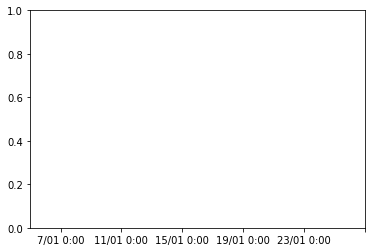

In [ ]:
import numpy as np

#tags = ['melvin']
#ids = set([])
#for title, op, id in zip(submissions['title'], submissions['selftext'], submissions['id']):
#    for tag in tags:
#        if tag in (str(title) + re.sub(r'http\S+', '', str(op))).lower():
#            ids.add(id)
#            break

#fds = set(flair_dict.keys())
#hly_fl_dict = {}
#for h, hset in hoursets.items():
#    hly_fl_dict[h] = {}
#    for fl in ['Discussion', 'YOLO', 'Meme', 'News', 'Gain', 'DD', 'Loss', 'Chart', 'Other']:
#        hly_fl_dict[h][fl] = 0
#    for op in hset['link_id']:
#        op = op[3:]
#        if op in fds:
#            hly_fl_dict[h][flair_dict[op]] += 1

#h3dv = [np.nansum(hset['three_day_visibility']) / len(hset) for hset in hoursets.values()]
#pr(h3dv)
#hdep = [sum(hset['depth']) / len(hset) for hset in hoursets.values()]
#hspr = [sum(hset['spread_score']) / len(hset) for hset in hoursets.values()]
#hgspr = [sum(hset['spread_score']) / len(hset) if len(hset) > 0 else 0 for hset in gme_hoursets.values()]
#hsgspr = [sum(hset['spread_score']) / len(hset) if len(hset) > 0 else 0 for hset in sgme_hoursets.values()]
#hvis = [np.nansum(hset['overall_visibility']) if len(hset) > 0 else 0 for hset in hoursets.values()]
#hgvis = [np.nansum(hset['overall_visibility']) if len(hset) > 0 else 0 for hset in gme_hoursets.values()]
#hvir = [sum(hset['virality']) / len(hset) for hset in hoursets.values()]
#hvirg = [np.nansum(hset['virality']) / len(hset) for hset in gme_hoursets.values()]
#hfl_dis_general = [hcnts['Discussion'] for hcnts in hly_fl_dict.values()]
#hfl_dis_gme = [hcnts['Discussion'] / hly_fl_dict[h]['Discussion'] if hcnts['Discussion'] else 0 for h, hcnts in hly_fl_dict_sgme.items()]
#hgme_general = [sum(hset['gme_scores']) / len(hset) for hset in ngme_hoursets.values()]
#hgme_gme = [sum(hset['gme_scores']) / len(hset) if len(hset) > 0 else 0.17 for hset in gme_hoursets.values()]
#hcnts = [len(hset) for hset in hoursets.values()]
##hcnts_gme = [len(hset) for hset in gme_hoursets.values()]
##hcnts_sgme = [len(hset) for hset in sgme_hoursets.values()]
#hcnts_other = [len(supertagfinder(hset, tags, ids)) for hset in hoursets.values()]
#hcnts_other2 = [len(supertagfinder(hset, tags2, ids2)) for hset in hoursets.values()]
#hcnts_other3 = [len(supertagfinder(hset, tags3, ids3)) for hset in sgme_hoursets.values()]
#hcnts_amc = [len(tagfinder(hset, ['amc']['blackberry', ' bb', 'black berry'][' nok']['deepfuckingvalue', 'keith gill']['ryan cohen', 'chewy']['melvin']['robinhood', 'robin hood']['to the moon', 'short squeeze', 'i just like the stock']
%matplotlib inline
import matplotlib.pyplot as plt

hrs = list([f'{(hour // 24) + 5}/01 {hour % 24}:00' for hour in hoursets])
tickz = [i for i in hrs if (int(i.split('/')[0]) + 1) % 4 == 0 and i.split(' ')[1][0] == '0']
pr(tickz)
plt.xticks([2*24, 6*24, 10*24, 14*24, 18*24, 22*24], tickz)#[2*24, 4*24, 6*24, 8*24, 10*24, 12*24, 14*24, 16*24, 18*24, 20*24, 22*24]
plt.rcParams["figure.figsize"] = (40,80)
#plt.plot(hrs, h3dv, label='Three-day visibility')
#plt.plot(hrs, hdep, label='Depth')
#plt.plot(hrs, hocs, label='Opening comments score')
plt.plot(hrs, ucom_sco, label='Users seen in comments')
plt.plot(hrs, uall_sco, label='Users seen total')
plt.plot(hrs, ugme_com_sco, label='Users in GME discourse comments')
plt.plot(hrs, ugme_all_sco, label='Users in GME discourse total')
#plt.plot(hrs, hgvis, label='GME visibility')
#plt.plot(hrs, hvirg, label='GME virality')
#plt.plot(hrs[:200], hcnts_gme[:200], label='GME')
#plt.plot(hrs, hcnts, label='Total')
#plt.plot(hrs, hcnts_gme, label='GME Mentions')
#plt.plot(hrs, hcnts_sgme, label='GME Discourse')
#plt.plot(hrs, hfl_dis_gme, label='Discussion')
#plt.plot(hrs, hgme_gme, label='TF-IDF comparison GME string and GME-mentioning posts')
plt.legend(loc='upper left')
#plt.ylim(0, 22)
#plt.xlim(90, 240)
plt.savefig('/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/cum_user_counts.png', bbox_inches='tight')
plt.show()

In [ ]:
responsiveness = {i: [] for i in less_coms['id']}
ids = set(less_coms['id'])
for id, par, utc in zip(less_coms['id'][::-1], less_coms['parent_id'][::-1], less_coms['created_utc'][::-1]):
    par = par[3:]
    dirch = len([i for i in responsiveness[id] if i > 100000000])
    responsiveness[id] = [i - utc for i in responsiveness[id][:dirch]] + responsiveness[id][dirch:]
    if par in ids:
        responsiveness[par] = [utc] + responsiveness[par] + responsiveness[id]
less_coms['responsiveness'] = [np.nanmean(i) for i in responsiveness.values()]
less_coms.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores,depth_children,virality,op_date,overall_visibility,three_day_visibility,depth,oc_score,spread_score,responsiveness
0,0,0,0,0,Experience says youth and Dems sit home for mi...,gi62f4a,PaxAmericana2,t2_3lbdczdr,t1_gi626v6,2021-01-05T10:38:58,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843138,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,and for and that why and for are for that is t...,Experience say youth and Dems sit home for mid...,Experience says youth Dems sit home midterms s...,NN VBZ NN CC NNP VBP NN IN NNS CC NNS RB : DT ...,25.0,4.600000,says sit 's are reserved says is expect,normally around,general fucky unexpected,NaN,NaN,1.0,4.0,0.076928,4,2.000000,NaN,NaN,NaN,0,1,5.377535,666.0
1,1,1,1,1,Pennystock.,gi62fil,000Kurpitsa000,t2_1z85h5uc,t1_gi61358,2021-01-05T10:39:10,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843150,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,True,NaN,NaN,Pennystock .,Pennystock .,NNP .,2.0,5.500000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0,0.000000,NaN,NaN,NaN,0,1,1.330693,NaN
2,2,2,2,2,Bought GLD calls for option #2. Gold will see ...,gi62fnw,Chitownfico,t2_opfs9lz,t1_gi626v6,2021-01-05T10:39:15,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843155,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,for will see than of if already the have and w...,Bought GLD call for option # 2 . Gold will see...,Bought GLD calls option # 2 . Gold highs highe...,NNP NNP VBZ IN NN # CD . NN MD VB NNS JJR IN N...,12.5,3.480000,calls see started have scale calls,already personally as well,higher,NaN,NaN,0.0,0.0,0.113157,0,0.000000,NaN,NaN,NaN,0,1,1.330693,NaN
3,3,3,3,3,"Not an American, what's up with that call tran...",gi62g7f,DoctorBalpak,t2_n4fqqpk,t1_gi62e6j,2021-01-05T10:39:30,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843170,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,an what up with that call it somewhere else to...,"Not an American , what 's up with that call tr...","Not American , 's transcript ? Read , n't unde...","RB DT JJ , WP VBZ RP IN DT NN NN . VB PRP RB R...",22.0,3.954545,'s Read did understand,Not somewhere else too n't,American,NaN,NaN,1.0,2.0,0.041331,2,1.333333,NaN,NaN,NaN,0,1,4.028588,176.5
4,4,4,4,4,PLEASE BNGO - just hold above at least 5.60 by...,gi62gab,gobearsgobears,t2_jm3lf,t3_kqhtg5,2021-01-05T10:39:32,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843172,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,just above at least by,PLEASE BNGO - just hold above at least 5.60 by...,PLEASE BNGO - hold 5.60 market open 😭,NNP NNP : RB VB RP IN JJS CD IN NN JJ NN,13.0,3.692308,hold,just,least open,NaN,NaN,1.0,2.0,0.121715,2,1.333333,NaN,NaN,NaN,0,1,4.028588,40.0


In [55]:
a = sorted(list(less_coms['responsiveness']))
tree_measures = {}
users = set(less_coms['author']).update(submissions['author'])
pr(users)
for m in ['responsiveness', 'total_children', 'virality']:
    tree_measures[m] = {u:0 for u in list(users)}

posts
comments
attractors

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



NameError: ignored

In [ ]:
import operator
#author_spreads = {a: 0 for a in less_coms['author'].unique()}
#for a, spr in zip(less_coms['author'], less_coms['spread_score']):
#    author_spreads[a] += spr
sorted_d = sorted(author_spreads.items(), key=lambda x: x[1], reverse=True)
print('Dictionary in ascending order by value : ',sorted_d)

Dictionary in ascending order by value :  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
top_users = {a: spr for (a, spr) in sorted_d[:500] if a not in ['[deleted]', 'AutoModerator']}
tu_gme = {u: False for u in top_users.keys()}
for a, body, utc in zip(less_coms['author'], less_coms['body'], less_coms['created_utc']):
    if a in tu_gme:
        if tu_gme[a]:
            continue
        for tag in ['gme', 'gamestop']:
            if tag in str(body).lower():
                tu_gme[a] = utc
str(sorted_d)[:500]

"[('[deleted]', 630421.8145278982), ('welle417', 21583.12439621129), ('AutoModerator', 15623.559572459439), ('ProbablyTrolling1', 14300.960993982178), ('PlaneIntroduction8', 12664.210080672197), ('FudgieThaWhale', 12395.265381098952), ('6r1n3i19', 12356.171320707113), ('MangoManYummy', 11933.147765228772), ('247drip1', 11374.343986206668), ('t3amkill', 10068.475764932253), ('landmanpgh', 9072.571167989212), ('TitusSupremus', 9058.665469959573), ('Mtz211', 8822.73403706987), ('TheHoneySacrifice', "

In [ ]:
no_gme = sum([1 for i in tu_gme.values() if not i])
no_gme

23

In [ ]:
spread_set = less_coms.sort_values('spread_score', ascending=False).reset_index()
#for i in spread_set['body'][:50]:
#    pr(i, 'ENDPOST \n\n')
spread_set.head()

,index,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores,depth_children,virality,op_date,overall_visibility,three_day_visibility,depth,oc_score,spread_score
0,798651,798651,798651,798651,798651,I've got 100k of margin available. For every 1...,gjckfag,welle417,t2_11af44,t3_kxw4hu,2021-01-15T15:03:17,/r/wallstreetbets/comments/kxw4hu/dont_relent_...,1610722997,15198,True,t3_kxw4hu,False,/r/wallstreetbets/comments/kxw4hu/dont_relent_...,False,"{'gid_1': 6, 'gid_2': 1}","[{'award_sub_type': 'PREMIUM', 'award_type': '...",33,True,NaN,of every this more in it all against my so it ...,I 've get 100k of margin available . For every...,I 've got 100k margin available . For 100 upvo...,PRP VBP VBD CD IN NN JJ . IN DT CD NNS DT VBZ ...,17.666667,3.396226,'ve got gets buy 's going 's be rides,na,available more gon other,'47','3633',105.0,263.0,0.249042,12,5.569190,[1610722658],10.787158,1.820824,0,15198,5038.214765
1,1637197,1637197,1637197,1637197,1637197,8 figure net worth. Amazing.,gk8nx7k,CharSiuPorkBun,t2_db7qw,t3_l2x7he,2021-01-22T21:15:17,/r/wallstreetbets/comments/l2x7he/gme_yolo_upd...,1611350117,12983,False,t3_l2x7he,False,/r/wallstreetbets/comments/l2x7he/gme_yolo_upd...,False,{'gid_1': 1},"[{'award_sub_type': 'PREMIUM', 'award_type': '...",3,False,NaN,NaN,8 figure net worth . Amazing .,8 figure net worth . Amazing .,CD JJ JJ NN . NNP .,3.500000,3.428571,NaN,NaN,figure net,'2','6519',45.0,416.0,0.030331,13,6.172431,[1611350048],5.217780,0.031055,0,12983,4306.398048
2,1718730,1718730,1718730,1718730,1718730,"Fucking congrats, I can’t believe an autist li...",gkcln2j,Ghost41794,t2_mdvxhyn,t3_l3aj4z,2021-01-23T11:34:11,/r/wallstreetbets/comments/l3aj4z/i_love_you_g...,1611401651,12977,False,t3_l3aj4z,False,/r/wallstreetbets/comments/l3aj4z/i_love_you_g...,False,{'gid_1': 2},"[{'award_sub_type': 'GLOBAL', 'award_type': 'g...",6,False,NaN,can an you the,"Fucking congrats , I can ’ t believe an autist...","Fucking congrats , I ’ t believe autist like g...","VBG NNS , PRP MD VB JJ VBP DT NN IN PRP VBD VB...",19.000000,3.842105,Fucking ’ believe got accepted,NaN,t,'1','3615',18.0,413.0,0.136963,13,6.822940,[1611401441],4.793838,0.000000,0,12977,4305.688159
3,1639700,1639700,1639700,1639700,1639700,"For those that are missing the whole context, ...",gk8q8gs,JB4GDI,t2_7znxe,t3_l2x7he,2021-01-22T21:25:54,/r/wallstreetbets/comments/l2x7he/gme_yolo_upd...,1611350754,11970,False,t3_l2x7he,False,/r/wallstreetbets/comments/l2x7he/gme_yolo_upd...,False,"{'gid_1': 4, 'gid_2': 1}","[{'award_sub_type': 'PREMIUM', 'award_type': '...",8,True,NaN,those that are the whole the is a with only in...,"For those that be miss the whole context , the...","For missing context , price paid little mislea...","IN DT WDT VBP VBG DT JJ NN , DT NN VBN VBZ DT ...",15.666667,3.914894,are missing paid is started turned 's climbing,actually still,whole little only,'2','6519',72.0,759.0,0.110194,16,6.803148,[1611350048],5.217780,0.031055,0,11970,3972.681879
4,1068806,1068806,1068806,1068806,1068806,"WSB vs Citron , the battle we’ve been waiting ...",gju38kx,shaunk925,t2_3au673r1,t3_l0lg6r,2021-01-19T15:02:16,/r/wallstreetbets/comments/l0lg6r/shitron_atta...,1611068536,10632,False,t3_l0lg6r,False,/r/wallstreetbets/comments/l0lg6r/shitron_atta...,False,{},"[{'award_sub_type': 'COMMUNITY', 'award_type':...",19,False,NaN,the we ve been for that into,"WSB v Citron , the battle we ’ ve be wait for ...","WSB vs Citron , battle ’ waiting . Lets turn l...","NNP NN NNP , DT NN PRP VBP RB VBN VBG IN . NNS...",9.500000,3.684211,’ been waiting turn,ve,NaN,'6','2889',70.0,120.0,0.069246,5,2.819284,[1611068333],7.658982,1.264257,0,

In [ ]:
#plt.hist(spread_set['spread_score'][200:], bins=50)
#spread_set['spread_score'][258]
import numpy as np
import math

log_gme_spreads = [math.log(i, 10) for i in spread_set_gme['spread_score'] if i > 0]
pr(np.std(log_gme_spreads), np.mean(log_gme_spreads))

0.4627507534683159 0.5119057260722623


In [ ]:
len(log_gme_spreads) * 0.025

11686.800000000001

In [ ]:
sorted(log_gme_spreads)[-11686]

1.6796661502940071

In [ ]:
spread_set_gme['spread_score'][:2808]

200.20038954860598

In [ ]:
spread_set_gme = gme_sset.sort_values('spread_score', ascending=False).reset_index()
for i in spread_set_gme['body'][:50]:
    pr(i, 'ENDPOST \n\n')

For those that are missing the whole context, the price paid is a little misleading.  He actually started with only **$53,000** in GME calls and turned it into $11 Million over the course 17 months.  And it's still climbing. ENDPOST 


A lot of words here, some of them big words. So due to this reason I will be yoloing my life savings into GME calls. ENDPOST 


[Check out this comment](https://www.reddit.com/r/wallstreetbets/comments/e8wqvs/gme_earnings_thread/fafnxyj/?context=3). This big dick daddy called it over a year ago. ENDPOST 


Please delete the Twitter account for fucks sake, there is literally nothing to gain and everything to lose. ENDPOST 


"Since the start of the conference, GME stock skyrocketed 36%. Would you still short?" ENDPOST 


Same, every time GME goes up, I am happy for my account but more so for DFV! ENDPOST 


Hey nerds I know you’re all excited to post how you doubled your stimulus check on GME  but before you post your SICK GAINS remember we have a minimum

In [ ]:
import seaborn as sns
# Create the default pairplot
sns.pairplot(list(hoursets.values())[200])

NameError: ignored

In [ ]:
ghours = {}
for hour in range(453):
    ghours[f'{(hour // 24) + 5}/01 {hour % 24}:00'] = 0

for utc in gme_set['created_utc']:
    jan5 = 1609804800
    i = (utc - jan5) // 3600
    #day = i + 5
    ghours[f'{(i // 24) + 5}/01 {i % 24}:00'] += 1

ghours

In [ ]:
ghrs = list(ghours.keys())
gposts = list(ghours.values())
pr(ghrs)

['5/01 0:00', '5/01 1:00', '5/01 2:00', '5/01 3:00', '5/01 4:00', '5/01 5:00', '5/01 6:00', '5/01 7:00', '5/01 8:00', '5/01 9:00', '5/01 10:00', '5/01 11:00', '5/01 12:00', '5/01 13:00', '5/01 14:00', '5/01 15:00', '5/01 16:00', '5/01 17:00', '5/01 18:00', '5/01 19:00', '5/01 20:00', '5/01 21:00', '5/01 22:00', '5/01 23:00', '6/01 0:00', '6/01 1:00', '6/01 2:00', '6/01 3:00', '6/01 4:00', '6/01 5:00', '6/01 6:00', '6/01 7:00', '6/01 8:00', '6/01 9:00', '6/01 10:00', '6/01 11:00', '6/01 12:00', '6/01 13:00', '6/01 14:00', '6/01 15:00', '6/01 16:00', '6/01 17:00', '6/01 18:00', '6/01 19:00', '6/01 20:00', '6/01 21:00', '6/01 22:00', '6/01 23:00', '7/01 0:00', '7/01 1:00', '7/01 2:00', '7/01 3:00', '7/01 4:00', '7/01 5:00', '7/01 6:00', '7/01 7:00', '7/01 8:00', '7/01 9:00', '7/01 10:00', '7/01 11:00', '7/01 12:00', '7/01 13:00', '7/01 14:00', '7/01 15:00', '7/01 16:00', '7/01 17:00', '7/01 18:00', '7/01 19:00', '7/01 20:00', '7/01 21:00', '7/01 22:00', '7/01 23:00', '8/01 0:00', '8/01 1:

['5/01 0:00', '5/01 1:00', '5/01 2:00', '5/01 3:00', '5/01 4:00', '5/01 5:00', '5/01 6:00', '5/01 7:00', '5/01 8:00', '5/01 9:00', '5/01 10:00', '5/01 11:00', '5/01 12:00', '5/01 13:00', '5/01 14:00', '5/01 15:00', '5/01 16:00', '5/01 17:00', '5/01 18:00', '5/01 19:00', '5/01 20:00', '5/01 21:00', '5/01 22:00', '5/01 23:00', '6/01 0:00', '6/01 1:00', '6/01 2:00', '6/01 3:00', '6/01 4:00', '6/01 5:00', '6/01 6:00', '6/01 7:00', '6/01 8:00', '6/01 9:00', '6/01 10:00', '6/01 11:00', '6/01 12:00', '6/01 13:00', '6/01 14:00', '6/01 15:00', '6/01 16:00', '6/01 17:00', '6/01 18:00', '6/01 19:00', '6/01 20:00', '6/01 21:00', '6/01 22:00', '6/01 23:00', '7/01 0:00', '7/01 1:00', '7/01 2:00', '7/01 3:00', '7/01 4:00', '7/01 5:00', '7/01 6:00', '7/01 7:00', '7/01 8:00', '7/01 9:00', '7/01 10:00', '7/01 11:00', '7/01 12:00', '7/01 13:00', '7/01 14:00', '7/01 15:00', '7/01 16:00', '7/01 17:00', '7/01 18:00', '7/01 19:00', '7/01 20:00', '7/01 21:00', '7/01 22:00', '7/01 23:00', '8/01 0:00', '8/01 1:

NameError: ignored

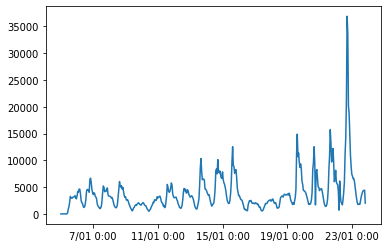

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

hrs = list(hours.keys())
posts = list(hours.values())
pr(hrs)
tickz = [i for i in hrs if (int(i.split('/')[0]) + 1) % 4 == 0 and i.split(' ')[1][0] == '0']
pr(tickz)
plt.xticks([2*24, 6*24, 10*24, 14*24, 18*24, 22*24], tickz)
plt.rcParams["figure.figsize"] = (40,80)
plt.plot(hrs, posts)
plt.plot(ghrs, gposts)
plt.ylim(0, 20000)
plt.savefig('/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/post_dist.png', bbox_inches='tight')
plt.show()

115560 44508 16696 9281
[997, 1000, 1006, 1011, 1015, 1039, 1044, 1049, 1053, 1063, 1092, 1100, 1116, 1116, 1119, 1129, 1140, 1171, 1171, 1176, 1187, 1213, 1215, 1223, 1230, 1241, 1244, 1276, 1281, 1309, 1323, 1328, 1353, 1385, 1388, 1407, 1418, 1487, 1501, 1506, 1509, 1641, 1721, 1769, 2011, 2213, 2489, 2812, 3632, 7224]
[99, 100, 101, 101, 102, 102, 102, 103, 103, 103, 103, 105, 106, 107, 108, 108, 110, 111, 112, 113, 115, 118, 123, 133, 135, 137, 137, 139, 139, 142, 147, 149, 161, 168, 170, 172, 172, 177, 180, 183, 193, 203, 204, 208, 214, 217, 229, 232, 284, 496]


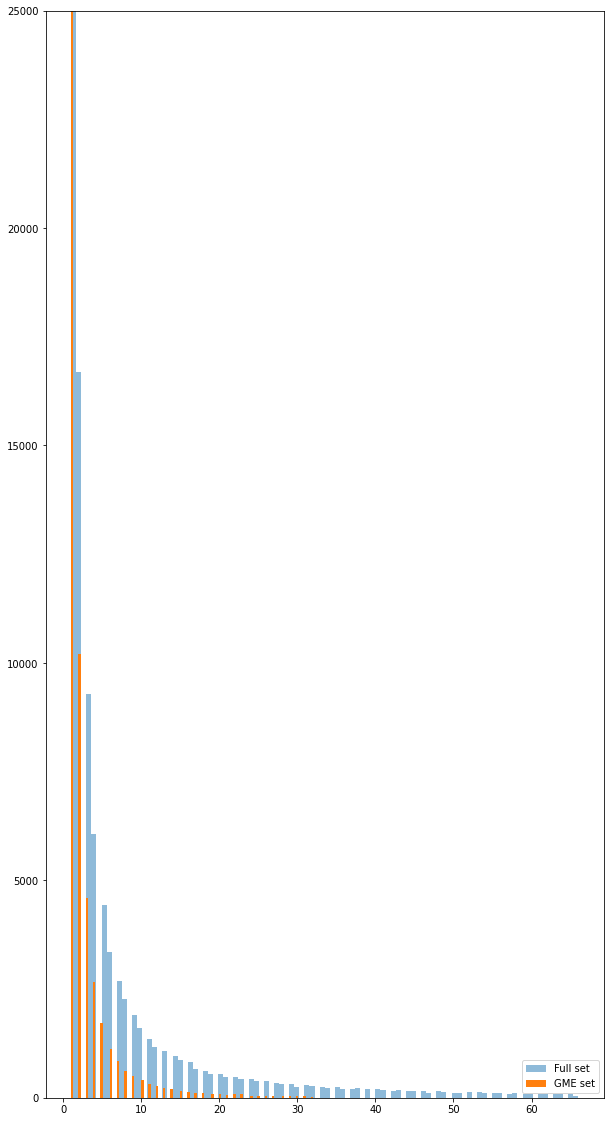

In [ ]:
pcounts = {}
for au in less_coms['author']:
    if au == '[deleted]':
        continue
    if au in pcounts:
        pcounts[au] += 1
    else:
        pcounts[au] = 1

gpcounts = {}
for au in gme_set['author']:
    if au == '[deleted]':
        continue
    if au in gpcounts:
        gpcounts[au] += 1
    else:
        gpcounts[au] = 1

cnts = sorted(pcounts.values())
gcnts = sorted(gpcounts.values())#[i*10 for i in sorted(gpcounts.values())]
pr(len(cnts), cnts.count(1), cnts.count(2), cnts.count(3))
pr(cnts[-50:])
pr(gcnts[-50:])
plt.rcParams["figure.figsize"] = (10,20)
plt.hist(cnts[:-5000], bins=100, alpha=0.5, label='Full set')
plt.hist(gcnts[:-500], bins=100, alpha=1, label='GME set')
plt.legend(loc='lower right')
plt.ylim(0, 25000)
plt.savefig('/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/user_dist.png', bbox_inches='tight')
plt.show()

In [ ]:
# hot ranking
from datetime import datetime, timedelta
from math import log

epoch = datetime(1970, 1, 1)
pr(datetime.fromtimestamp(1609804800))

def epoch_seconds(date):
    td = date - epoch
    return td.days * 86400 + td.seconds + (float(td.microseconds) / 1000000)

def score(ups, downs):
    return ups - downs

def hot(ups, downs, date):
    s = score(ups, downs)
    order = log(max(abs(s), 1), 10)
    sign = 1 if s > 0 else -1 if s < 0 else 0
    seconds = epoch_seconds(date) - 1134028003
    return round(sign * order + seconds / 45000, 7)

2021-01-05 00:00:00


                       created_utc     score  ...  stickied  total_awards_received
created_utc               1.000000  0.003157  ... -0.046455               0.008136
score                     0.003157  1.000000  ... -0.001590               0.861864
is_submitter             -0.112476  0.007640  ...  0.018351               0.006205
no_follow                 0.036582 -0.065870  ... -0.074385              -0.055595
stickied                 -0.046455 -0.001590  ...  1.000000               0.102384
total_awards_received     0.008136  0.861864  ...  0.102384               1.000000

[6 rows x 6 columns]


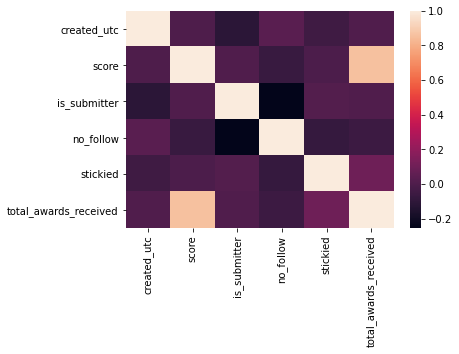

In [ ]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

correlaties = comments.dropna().corr()
pr(correlaties)
sns.heatmap(correlaties)

In [ ]:
from sklearn import linear_model
X = df
y = target[“MEDV”]
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(predictions)[0:5]
lm.score(X,y)

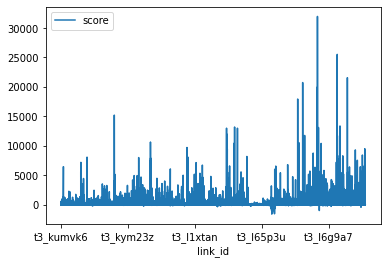

In [ ]:
comments['created_utc'].fillna(0)
comments['op_scores'].fillna(0)
comments.plot(x='link_id', y='score', kind='line')

# Some extra features

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

def pr(*a):
    print(*a)

comments = pd.read_csv("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_set.csv")
comments.tail()

Mounted at /content/gdrive


In [ ]:
import sklearn.feature_extraction.text as text
# improved list from Stone, Denis, Kwantes (2010)
STOPWORDS = "a about above across after afterwards again against all almost alone along already also although always am among amongst amoungst amount an and another any anyhow anyone anything anyway anywhere are around as at back be became because become becomes becoming been before beforehand behind being below beside besides between beyond bill both bottom but by call can cannot cant co computer con could couldnt cry de describe detail did didn do does doesn doing don done down due during each eg eight either eleven else elsewhere empty enough etc even ever every everyone everything everywhere except few fifteen fify fill find fire first five for former formerly forty found four from front full further get give go had has hasnt have he hence her here hereafter hereby herein hereupon hers herself him himself his how however hundred i ie if in inc indeed interest into is it its itself keep last latter latterly least less ltd just kg km made make many may me meanwhile might mill mine more moreover most mostly move much must my myself name namely neither never nevertheless next nine no nobody none noone nor not nothing now nowhere of off often on once one only onto or other others otherwise our ours ourselves out over own part per perhaps please put rather re quite rather really regarding same say see seem seemed seeming seems serious several she should show side since sincere six sixty so some somehow someone something sometime sometimes somewhere still such system take ten than that the their them themselves then thence there thereafter thereby therefore therein thereupon these they thick thin third this those though three through throughout thru thus to together too top toward towards twelve twenty two un under until up unless upon us used using various very very via was we well were what whatever when whence whenever where whereafter whereas whereby wherein whereupon wherever whether which while whither who whoever whole whom whose why will with within without would yet you your yours yourself yourselves"
STOPWORDS = frozenset(w for w in STOPWORDS.split() if w)
#adding more stop words
my_additional_stop_words = ['don','ve','ll', 'yes','man','no', 'men', 'oh','know', 'come', 'need', 'will']
sklearn_stopwords =  text.ENGLISH_STOP_WORDS
gensim_stopwords = STOPWORDS
stop_words = sklearn_stopwords.union(gensim_stopwords)
stop_words = stop_words.union(my_additional_stop_words)
pr(len(stop_words), stop_words)

347 frozenset({'along', 'amoungst', 'ourselves', 'fifteen', 'put', 'system', 'thus', 'perhaps', 'first', 'made', 'does', 'almost', 'than', 'twenty', 'on', 'de', 'four', 'come', 'five', 'some', 'we', 'less', 'more', 'towards', 'quite', 'whose', 'this', 'become', 'across', 'an', 'same', 'these', 'front', 'your', 'once', 'though', 'is', 'noone', 'off', 'upon', 'being', 'but', 'somewhere', 'you', 'hereupon', 'hence', 'never', 'hers', 'among', 'other', 'if', 'has', 'been', 'take', 'forty', 'thick', 'moreover', 'no', 'un', 'yourselves', 'him', 'toward', 'seeming', 'sometime', 'couldnt', 'while', 'thru', 'behind', 'either', 'could', 'hasnt', 'least', 'too', 'enough', 'and', 'may', 'doesn', 'anyone', 'themselves', 'herself', 'many', 'thereafter', 'one', 'really', 'seem', 'rather', 'for', 'last', 'fifty', 'top', 'none', 'from', 'there', 'without', 'else', 'during', 'against', 'everywhere', 'neither', 'beside', 'afterwards', 'whole', 'those', 'must', 'she', 'can', 'after', 'all', 'before', 'cry'

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer  
lemmatizer = WordNetLemmatizer()
import string

words, lemmas, postags, wlens, slens, nonstopws, stopws, verbs, adverbs, adjecs, punct = [], [], [], [], [], [], [], [], [], [], []
count = 0
for i in comments['body']:
    #train_stanza.append(nlp(i))
    toked = word_tokenize(i)
    words.append(' '.join(toked))
    tagged = pos_tag(toked)
    #lemmas.append(' '.join([lemmatizer.lemmatize(w, tag[0].lower()) for w, tag in k if tag[0].lower() in ['a', 'r', 'n', 'v'] else w for k in j] for j in tagged]))
    postags.append(' '.join([j[1] for j in tagged]))
    if len(toked):
        wlens.append(sum([len(j) for j in toked]) / len(toked))
    else:
        wlens.append(0)
    toksent = sent_tokenize(i)
    if len(toksent):
        slens.append(sum([len(word_tokenize(j)) for j in toksent]) / len(toksent))
    else:
        slens.append(0)
    nonstopws.append(' '.join([j for j in toked if j not in stop_words]))
    stopws.append(' '.join([j for j in toked if j in stop_words]))
    verbs.append(' '.join([j[0] for j in tagged if j[1][:2] == 'VB']))
    adverbs.append(' '.join([j[0] for j in tagged if j[1][:2] == 'RB']))
    adjecs.append(' '.join([j[0] for j in tagged if j[1][:2] == 'JJ']))

    count += 1
    if count >= 200:
        print('boink\n', len(words))
        count = 0

lemmas = []
pr(len(tagged), len(wlens), len(slens), len(stopws), len(adverbs))
for i in comments['body']:
    tagged = pos_tag(word_tokenize(i))
    lems = []
    for k in tagged:
        if len(k) < 2:
            lems.append(k[0])
            continue
        if k[1][0].lower() in ['a', 'r', 'n', 'v']:
            lems.append(lemmatizer.lemmatize(k[0], k[1][0].lower()))
        else:
            lems.append(k[0])
    lemmas.append(' '.join(lems))

comments['stopwords'] = stopws
comments['lemmas'] = lemmas
comments['non_stop_words'] = nonstopws
comments['pos_tags'] = postags
comments['sent_length'] = slens
comments['word_length'] = wlens
comments['verbs'] = verbs
comments['adverbs'] = adverbs
comments['adjectives'] = adjecs
#comments['text_with_op'] = 'd'###
#comments['children'] = comment_tree_getter(comments['id'], print_mode=False)[4]
comments.head()

Streaminguitvoer ingekort tot de laatste 5000 regels.
 1774200
boink
 1774400
boink
 1774600
boink
 1774800
boink
 1775000
boink
 1775200
boink
 1775400
boink
 1775600
boink
 1775800
boink
 1776000
boink
 1776200
boink
 1776400
boink
 1776600
boink
 1776800
boink
 1777000
boink
 1777200
boink
 1777400
boink
 1777600
boink
 1777800
boink
 1778000
boink
 1778200
boink
 1778400
boink
 1778600
boink
 1778800
boink
 1779000
boink
 1779200
boink
 1779400
boink
 1779600
boink
 1779800
boink
 1780000
boink
 1780200
boink
 1780400
boink
 1780600
boink
 1780800
boink
 1781000
boink
 1781200
boink
 1781400
boink
 1781600
boink
 1781800
boink
 1782000
boink
 1782200
boink
 1782400
boink
 1782600
boink
 1782800
boink
 1783000
boink
 1783200
boink
 1783400
boink
 1783600
boink
 1783800
boink
 1784000
boink
 1784200
boink
 1784400
boink
 1784600
boink
 1784800
boink
 1785000
boink
 1785200
boink
 1785400
boink
 1785600
boink
 1785800
boink
 1786000
boink
 1786200
boink
 1786400
boink
 1786600
boink
 

,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives
0,:'D,givxqie,hubblebubble7,t2_684wrle,t1_givwjap,2021-01-11T14:57:53,/r/wallstreetbets/comments/kumvk6/what_are_you...,1610377073,1,False,t3_kumvk6,False,/r/wallstreetbets/comments/kumvk6/what_are_you...,False,{},[],0,False,NaN,,: 'D,: 'D,: NN,2.0,1.500000,,,
1,NIO + NVIDA calls = 🔥🚀📈,givxqjn,mizzaponster,t2_5ww3ps94,t3_kv0ij6,2021-01-11T14:57:53,/r/wallstreetbets/comments/kv0ij6/daily_discus...,1610377073,2,False,t3_kv0ij6,True,/r/wallstreetbets/comments/kv0ij6/daily_discus...,False,{},[],0,False,NaN,,NIO + NVIDA call = 🔥🚀📈,NIO + NVIDA calls = 🔥🚀📈,NNP NNP NNP VBZ CD NN,6.0,3.000000,calls,,
2,Get into another green stock. Fcel is purely s...,givxqo1,richardrox24,t2_doyoa5s,t1_givxl8v,2021-01-11T14:57:55,/r/wallstreetbets/comments/kv0ij6/daily_discus...,1610377075,1,False,t3_kv0ij6,True,/r/wallstreetbets/comments/kv0ij6/daily_discus...,False,{},[],0,False,NaN,into another is and is,Get into another green stock . Fcel be purely ...,Get green stock . Fcel purely speculation way ...,NNP IN DT JJ NN . NNP VBZ JJ NN CC VBZ NN JJ,7.0,4.714286,is is,,green purely overvalued
3,"My fellow AAPL holders, diamond hands baby\nSe...",givxqor,thunderbt16,t2_11wni6,t3_kv0ij6,2021-01-11T14:57:55,/r/wallstreetbets/comments/kv0ij6/daily_discus...,1610377075,3,False,t3_kv0ij6,False,/r/wallstreetbets/comments/kv0ij6/daily_discus...,False,{},[],0,False,NaN,you all in,"My fellow AAPL holder , diamond hand baby See ...","My fellow AAPL holders , diamond hands baby Se...","PRP$ JJ NNP NNS , NN NNS VBP NNP PRP DT IN NNP NN",14.0,4.214286,baby,,fellow
4,weak ass pump,givxqou,rustypoons,t2_3uu3xna,t3_kv0ij6,2021-01-11T14:57:55,/r/wallstreetbets/comments/kv0ij6/daily_discus...,1610377075,0,False,t3_kv0ij6,True,/r/wallstreetbets/comments/kv0ij6/daily_discus...,False,{},[],0,False,NaN,,weak as pump,weak ass pump,JJ NN NN,3.0,3.666667,,,weak


In [ ]:
comments.to_pickle("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_set.pkl")
comments.to_pickle("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_set2.pkl")

In [ ]:
precomments = pd.read_pickle("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_preadds.pkl")
precomments.tail()

,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children
411709,TSLA is testing the 835 support for like the 4...,giwm4vu,polychris,t2_dokso,t3_kv0ij6,2021-01-11T17:40:43,/r/wallstreetbets/comments/kv0ij6/daily_discus...,1610386843,10,False,t3_kv0ij6,False,/r/wallstreetbets/comments/kv0ij6/daily_discus...,False,{},[],0,False,NaN,is the for the this,TSLA be test the 835 support for like the 4th ...,TSLA testing 835 support like 4th time morning .,NNP VBZ VBG DT CD NN IN IN DT JJ NN DT NN .,14.0,3.928571,is testing,,4th,1.0,32330.0,0,0
411710,"Hey CCP, you need to suck some ElonGates dick ...",giwm4y9,CrazyFrenchLadies,t2_4v9jldfs,t3_kuhibq,2021-01-11T17:40:44,/r/wallstreetbets/comments/kuhibq/wallstreetsb...,1610386844,1,False,t3_kuhibq,True,/r/wallstreetbets/comments/kuhibq/wallstreetsb...,False,{},[],0,False,NaN,you need to some before you become here for yo...,"Hey CCP , you need to suck some ElonGates dick...","Hey CCP , suck ElonGates dick welcome . Same c...","NNP NNP , PRP VBP TO VB DT NNS VBP IN PRP VBP ...",13.0,3.961538,need suck dick become cold,here,welcome,7.0,2924.0,0,0
411711,GME too big for ICR. Jk idk,giwm4z4,AeroEngineer56,t2_55yvz4ca,t1_giwlmc1,2021-01-11T17:40:44,/r/wallstreetbets/comments/kv0ij6/daily_discus...,1610386844,2,False,t3_kv0ij6,True,/r/wallstreetbets/comments/kv0ij6/daily_discus...,False,{},[],0,False,NaN,too for,GME too big for ICR . Jk idk,GME big ICR . Jk idk,NNP RB JJ IN NNP . NNP NN,4.0,2.625000,,too,big,1.0,32330.0,0,0
411712,Glad it isn’t last Friday,giwm50g,TheGuyAboveMeSucks,t2_7q7kj,t1_giwlt13,2021-01-11T17:40:44,/r/wallstreetbets/comments/kv7hne/pltr_115_yolo/,1610386844,13,False,t3_kv7hne,False,/r/wallstreetbets/comments/kv7hne/pltr_115_yol...,False,{},[],0,False,NaN,it last,Glad it isn ’ t last Friday,Glad isn ’ t Friday,VB PRP JJ NNP NN JJ NNP,7.0,3.000000,Glad,,isn last,9.0,100.0,0,0
411713,You're high as a kite. Weeklies will print.,giwm51j,shallow-pedantic,t2_cwgu3,t1_giwleiy,2021-01-11T17:40:45,/r/wallstreetbets/comments/kv0ij6/daily_discus...,1610386845,1,False,t3_kv0ij6,True,/r/wallstreetbets/comments/kv0ij6/daily_discus...,False,{},[],0,False,NaN,as a will,You 're high as a kite . Weeklies will print .,You 're high kite . Weeklies print .,PRP VBP JJ IN DT NN . NNS MD VB .,5.5,3.272727,'re print,,high,1.0,32330.0,1,3


In [ ]:
for i, chil in enumerate(comments['direct_children'][::-1]):
    if not pd.isnull(chil):
        pr(len(comments) - i, i)
        break

0


In [ ]:
### MOVED TO REDDIT_TESTS
import numpy as np
import ast

#direct_children = {}
#total_children = {}
##texts_w_op = []
#op_scores = []
#page_comments = []
#cntr = 0
#for id in comments['id']:
#    direct_children[id] = 0
#    total_children[id] = 0
#pr('children dict ready')

with open('/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/new_cols_save.txt', 'r') as loader:
    save_cols = loader.readlines()
    pr(len(save_cols))
    pr(len(save_cols[0]), save_cols[0][:500])
#    texts_w_op = save_cols[0][1:-2].split(', ') #ast.literal_eval(save_cols[0])
    op_scores = save_cols[0][1:-2].split(', ')
    page_comments = save_cols[1][1:-2].split(', ')
    direct_children = {i.split(': ')[0][1:-1] : int(i.split(': ')[1]) for i in save_cols[2][1:-2].split(', ')}
    total_children = {i.split(': ')[0][1:-1] : int(i.split(': ')[1]) for i in save_cols[3][1:-2].split(', ')}

pr(len(op_scores), len(page_comments), len(direct_children), len(total_children)) #len(texts_w_op), 
#boi = bai
cntr = 2070000
ops = set(submissions['id'])
ids = set(comments['id'])
for id, body, par, opid in zip(comments['id'][-2070000:-2262016:-1], comments['body'][-2070000:-2262016:-1], comments['parent_id'][-2070000:-2262016:-1], comments['link_id'][-2070000:-2262016:-1]):
    if cntr % 10000 == 0:
        with open('/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/new_cols_save2.txt', 'w') as saver:
            #saver.write(str(texts_w_op) + '\n')
            saver.write(str(op_scores) + '\n')
            saver.write(str(page_comments) + '\n')
            saver.write(str(direct_children) + '\n')
            saver.write(str(total_children) + '\n')
    par = par[3:]
    opid = opid[3:]
    if par is not opid and par in ids:
        direct_children[par] += 1
        total_children[par] += 1 + total_children[id]
    if opid in ops:
        op = submissions[submissions['id'] == opid]
        #texts_w_op.append((str(op.iloc[0]['title']) + str(op.iloc[0]['selftext']) + str(body)).replace(',', '[COMMA]'))
        op_scores.append(op.iloc[0]['score'])
        page_comments.append(op.iloc[0]['num_comments'])
    else:
        #texts_w_op.append(body.replace(',', '[COMMA]'))
        op_scores.append(np.nan)
        page_comments.append(np.nan)
    cntr += 1
    if cntr % 1000 == 0:
        pr(cntr)
        if cntr % 10000 == 0:
            with open('/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/new_cols_save.txt', 'w') as saver:
                #saver.write(str(texts_w_op) + '\n')
                saver.write(str(op_scores) + '\n')
                saver.write(str(page_comments) + '\n')
                saver.write(str(direct_children) + '\n')
                saver.write(str(total_children) + '\n')
print(len(texts_w_op), len(total_children))
print(cntr)
#comments['text_with_op'] = [i.replace('[COMMA]', ',') for i in texts_w_op][::-1]
comments['direct_children'] = list(direct_children.values())
comments['total_children'] = list(total_children.values())
comments['op_scores'] = op_scores[::-1]
comments['page_comments'] = page_comments[::-1]
comments.head()

4
11961481 ['1293', '1293', '3182', '1293', '2907', '8386', '8386', '1293', '8386', '8386', '1074', '1293', '8386', '1293', '8386', '1293', '5744', '8386', '8386', '1369', '1293', '1369', '8386', '1293', '8386', '1293', '1293', '1293', '8386', '3182', '3182', '1293', '8386', '1293', '3182', '516', '2013', '1', '1293', '2586', '1293', '1293', '8386', '8386', '1293', '1293', '8386', '8386', '8386', '1293', '1230', '2', 'nan', '1293', '8386', '1133', 'nan', '1293', '1293', '1293', '2586', '670', '8386', '1293
2070000 2070000 2673797 2673797
2071000
2072000
2073000
2074000
2075000
2076000
2077000
2078000
2079000
2080000
2081000
2082000
2083000
2084000
2085000
2086000
2087000
2088000
2089000
2090000
2091000
2092000
2093000
2094000
2095000
2096000
2097000
2098000
2099000
2100000
2101000
2102000
2103000
2104000
2105000
2106000
2107000
2108000
2109000
2110000
2111000
2112000
2113000
2114000
2115000
2116000
2117000
2118000
2119000
2120000
2121000
2122000
2123000
2124000
2125000
2126000
2127000


NameError: ignored

In [ ]:
with open('/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/new_cols_save.txt', 'w') as saver:
    #saver.write(str(texts_w_op) + '\n')
    saver.write(str(op_scores) + '\n')
    saver.write(str(page_comments) + '\n')
    saver.write(str(direct_children) + '\n')
    saver.write(str(total_children) + '\n')

idxs2do = list(direct_children.keys())[-2262016:]
direct_children2 = {i:j for i, j in list(direct_children.items())[-2262016:]}
total_children2 = {i:j for i, j in list(total_children.items())[-2262016:]}

comments['direct_children'][-2262016:] = list(direct_children2.values())
comments['total_children'][-2262016:] = list(total_children2.values())
comments['op_scores'][-2262016:] = op_scores[::-1]
comments['page_comments'][-2262016:] = page_comments[::-1]
comments.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: Se

,Unnamed: 0,Unnamed: 0.1,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores
2673792,2673792,2685728,"If you don't use any of that money, yes you ca...",gl1xe0v,liam_l25,t2_tbsxx,t1_gl1x7mv,2021-01-28T05:22:01,/r/wallstreetbets/comments/l6lhma/epstein_shen...,1611811321,1,False,t3_l6lhma,True,/r/wallstreetbets/comments/l6lhma/epstein_shen...,False,{},[],0,False,NaN,you do any of that yes you can just that back ...,"If you do n't use any of that money , yes you ...","If n't use money , transfer $ 2000 bank fees ....","IN PRP VBP RB VB DT IN DT NN , UH PRP MD RB VB...",16.333333,3.836735,do use transfer Adding gain lose 's invested,n't just back just not not,NaN,'2907','2838',0.0,0.0,0.113619
2673793,2673793,2685732,The markets will open up again at 9:30am easte...,gl1xe1l,SOAPY-SALAD,t2_1afdepj4,t1_gl1x6bl,2021-01-28T05:22:01,/r/wallstreetbets/comments/l6o2gi/what_are_you...,1611811321,1,False,t3_l6o2gi,True,/r/wallstreetbets/comments/l6o2gi/what_are_you...,False,{},[],0,False,NaN,will up again at,The market will open up again at 9:30am easter...,The markets open 9:30am eastern time . God Spe...,DT NNS MD VB RP RB IN CD JJ NN . NNP NN .,7.000000,3.857143,open,again,eastern,'1293','67785',0.0,0.0,0.063281
2673794,2673794,2685734,[removed],gl1xe2t,[deleted],NaN,t1_gl1lv5e,2021-01-28T05:22:02,/r/wallstreetbets/comments/l6mwjk/wsbs_revenge...,1611811322,1,False,t3_l6mwjk,True,/r/wallstreetbets/comments/l6mwjk/wsbs_revenge...,False,{},[],0,NaN,NaN,NaN,[ remove ],[ removed ],NN VBD NNS,3.000000,3.000000,removed,NaN,NaN,'3182','3037',0.0,0.0,0.000000
2673795,2673795,2685733,I don’t want to waste my money trying somethin...,gl1xe3i,Jaydon1,t2_rni1d,t1_gl1x9ro,2021-01-28T05:22:02,/r/wallstreetbets/comments/l6o2gi/what_are_you...,1611811322,1,False,t3_l6o2gi,True,/r/wallstreetbets/comments/l6o2gi/what_are_you...,False,{},[],0,False,NaN,don to my something just because it need this ...,I don ’ t want to waste my money try something...,I ’ t want waste money trying new ’ s exotic ....,PRP VBP JJ NN VBP TO VB PRP$ NN VBG NN JJ RB I...,8.250000,3.454545,don want waste trying ’ need thought was were,just,’ new s exotic,'1293','67785',0.0,0.0,0.125739
2673796,2673796,2685735,[removed],gl1xe4k,[deleted],NaN,t3_l6o2gi,2021-01-28T05:22:02,/r/wallstreetbets/comments/l6o2gi/what_are_you...,1611811322,1,False,t3_l6o2gi,True,/r/wallstreetbets/comments/l6o2gi/what_are_you...,False,{},[],0,NaN,NaN,NaN,[ remove ],[ removed ],NN VBD NNS,3.000000,3.000000,removed,NaN,NaN,'1293','67785',0.0,0.0,0.000000


In [ ]:
comments.to_csv("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_set.csv")

In [ ]:
import pandas as pd

less_coms = pd.read_csv("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_set_small.csv")
less_coms.tail()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (32,33,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores,depth_children,virality,op_date,overall_visibility,three_day_visibility,depth,oc_score,spread_score
1749995,1749995,1749995,1749995,1749995,IV too high prob.,gkfubsm,dgora1,t2_5eb955tr,t1_gkfu6ge,2021-01-23T20:27:16,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611433636,5,False,t3_l2wx2p,False,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,False,NaN,too,IV too high prob .,IV high prob .,NNP RB JJ NN .,5.0,2.800000,NaN,too,high,'1','56548',0.0,0.0,0.040158,0,0.0,[1611349217],5.246445,0.036376,1,4,1.676980
1749996,1749996,1749996,1749996,1749996,"This 100%, someone or multiple people submitte...",gkfubx5,Da_Spooky_Ghost,t2_ez1a8,t1_gkf8yh1,2021-01-23T20:27:17,/r/wallstreetbets/comments/l3fthj/stop_harassi...,1611433637,2,False,t3_l3fthj,True,/r/wallstreetbets/comments/l3fthj/stop_harassi...,False,{},[],0,False,NaN,someone or or to get a and were because no wer...,"This 100 % , someone or multiple people submit...","This 100 % , multiple people submitted request...","DT CD NN , NN CC JJ NNS VBN NNS CC VBN JJ NN T...",80.0,4.287500,submitted contacted get were were made made ha...,obviously probably just even,multiple costumer unsuccessful weren ordinary ...,'1','707',0.0,0.0,0.090406,0,0.0,[1611421176],4.622802,0.000000,1,23,2.689975
1749997,1749997,1749997,1749997,1749997,qnx real-time os?,gkfubz5,yoholife,t2_5zdaiirs,t1_gkft510,2021-01-23T20:27:18,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611433638,1,False,t3_l2wx2p,True,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,False,NaN,NaN,qnx real-time o ?,qnx real-time os ?,JJ JJ NN .,4.0,3.750000,NaN,NaN,qnx real-time,'1','56548',1.0,1.0,0.082497,0,1.0,[1611349217],5.246445,0.036376,3,9,3.080351
1749998,1749998,1749998,1749998,1749998,LMAO,gkfuc0j,gini_lee1003,t2_5n1yzu2y,t1_gkfismd,2021-01-23T20:27:18,/r/wallstreetbets/comments/l3iiir/crsr_looks_i...,1611433638,11,False,t3_l3iiir,False,/r/wallstreetbets/comments/l3iiir/crsr_looks_i...,False,{},[],0,True,NaN,NaN,LMAO,LMAO,NN,1.0,4.000000,NaN,NaN,NaN,'1','120',1.0,1.0,0.027646,0,1.0,[1611429932],4.546917,0.000000,1,157,17.272229
1749999,1749999,1749999,1749999,1749999,"$1,000 quicker than a snicker",gkfuc82,AlphaZ33,t2_2i3675gk,t1_gkfu2xk,2021-01-23T20:27:20,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611433640,7,False,t3_l2wx2p,False,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,False,NaN,than a,"$ 1,000 quicker than a snicker","$ 1,000 quicker snicker",$ CD NN IN DT NN,6.0,4.166667,NaN,NaN,NaN,'1','56548',0.0,0.0,0.026850,0,0.0,[1611349217],5.246445,0.036376,1,13,2.751734


In [ ]:
with open('/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/thread_dict_better.txt', 'r') as loader:
    thread_dict = loader.read()
with open('/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/pre_thread_dict.txt', 'r') as loader:
    thread_dict2 = loader.read()

In [ ]:
import re

depths, oc_scores, scos = {}, {}, {}
for id, sco in zip(less_coms['id'], less_coms['score']):
    depths[id] = 0
    oc_scores[id] = 0
    scos[id] = sco

td2ids = [i for i in re.split(",| |:|\'", str(thread_dict2)) if len(i) > 0]
pr(td2ids[:50])
dps = set(depths.keys())
depth = -2
for i in td2ids:
    if i[0] in ['{', '}']:
        depth += i.count('{') - i.count('}')
        continue
    elif depth < 0:
        continue
    if depth == 0:
        if i in dps:
            op_score = scos[i]
        else:
            op_score = 0
    if i in dps:
        depths[i] = depth
        oc_scores[i] = op_score

t2i = set(td2ids)
tdids = [i for i in re.split(",| |:|\'", str(thread_dict)) if len(i) > 0]
pr(tdids[:50])
dps = set(depths.keys())
depth = -2
for i in tdids:
    if i[0] in ['{', '}']:
        depth += i.count('{') - i.count('}')
        continue
    if i in t2i:
        continue
    elif depth < 0:
        continue
    if depth == 0:
        if i in dps:
            op_score = scos[i]
        else:
            op_score = 0
    if i in dps:
        depths[i] = depth
        oc_scores[i] = op_score

['{', 'kqhtg5', '{', 'giq0xzm', '{}', 'giq0xap', '{', 'giq2qac', '{', 'giwmqcz', '{', 'giwowf4', '{', 'gixvx1d', '{', 'giyhlsr', '{', 'gj17hz8', '{}', '}', '}', '}', '}', 'giwmqcz', '{}}}', 'ginjgyc', '{}', 'gim38rz', '{}', 'gil6uxl', '{', 'gilbkem', '{', 'gilcbgp', '{}}}', 'gik64dj', '{', 'giu0jpj', '{}}', 'gidr2ub', '{}', 'gicsim3', '{', 'gicx1ko', '{}}', 'gic0vn2', '{}', 'gibziro', '{}', 'gibk3w7']
['{', 'kvah6p', '{}', 'kvahbf', '{}', 'kvahf0', '{}', 'kvai2x', '{}', 'kvairv', '{}', 'kvaj1s', '{', 'gix6pm3', '{}', 'gix657z', '{}', 'gix4jh9', '{', 'gix53bb', '{}}', 'gix4f87', '{}', 'gix46dp', '{}}', 'kvakbe', '{}', 'kval3h', '{', 'giyn1p9', '{}', 'giy6smn', '{', 'giy7c2d', '{}', '}', 'gixgtwm', '{', 'gixpa1v', '{', 'gixv3ic', '{', 'gixzg53', '{}', '}', '}', 'gixh7o5', '{}', '}', 'gixgs8l']


In [ ]:
less_coms['depth'] = list(depths.values())
less_coms['oc_score'] = list(oc_scores.values())
less_coms.to_csv("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_set_small.csv")
less_coms.head(50)

,Unnamed: 0,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores,depth_children,virality,op_date,overall_visibility,three_day_visibility,depth,oc_score
0,0,Experience says youth and Dems sit home for mi...,gi62f4a,PaxAmericana2,t2_3lbdczdr,t1_gi626v6,2021-01-05T10:38:58,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843138,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,and for and that why and for are for that is t...,Experience say youth and Dems sit home for mid...,Experience says youth Dems sit home midterms s...,NN VBZ NN CC NNP VBP NN IN NNS CC NNS RB : DT ...,25.000000,4.600000,says sit 's are reserved says is expect,normally around,general fucky unexpected,NaN,NaN,1.0,4.0,0.066015,4,2.000000,NaN,NaN,NaN,0,1
1,1,Pennystock.,gi62fil,000Kurpitsa000,t2_1z85h5uc,t1_gi61358,2021-01-05T10:39:10,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843150,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,True,NaN,NaN,Pennystock .,Pennystock .,NNP .,2.000000,5.500000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0,0.000000,NaN,NaN,NaN,0,1
2,2,Bought GLD calls for option #2. Gold will see ...,gi62fnw,Chitownfico,t2_opfs9lz,t1_gi626v6,2021-01-05T10:39:15,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843155,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,for will see than of if already the have and w...,Bought GLD call for option # 2 . Gold will see...,Bought GLD calls option # 2 . Gold highs highe...,NNP NNP VBZ IN NN # CD . NN MD VB NNS JJR IN N...,12.500000,3.480000,calls see started have scale calls,already personally as well,higher,NaN,NaN,0.0,0.0,0.088376,0,0.000000,NaN,NaN,NaN,0,1
3,3,"Not an American, what's up with that call tran...",gi62g7f,DoctorBalpak,t2_n4fqqpk,t1_gi62e6j,2021-01-05T10:39:30,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843170,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,an what up with that call it somewhere else to...,"Not an American , what 's up with that call tr...","Not American , 's transcript ? Read , n't unde...","RB DT JJ , WP VBZ RP IN DT NN NN . VB PRP RB R...",22.000000,3.954545,'s Read did understand,Not somewhere else too n't,American,NaN,NaN,1.0,2.0,0.034389,2,1.333333,NaN,NaN,NaN,0,1
4,4,PLEASE BNGO - just hold above at least 5.60 by...,gi62gab,gobearsgobears,t2_jm3lf,t3_kqhtg5,2021-01-05T10:39:32,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843172,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,just above at least by,PLEASE BNGO - just hold above at least 5.60 by...,PLEASE BNGO - hold 5.60 market open 😭,NNP NNP : RB VB RP IN JJS CD IN NN JJ NN,13.000000,3.692308,hold,just,least open,NaN,NaN,1.0,2.0,0.115958,2,1.333333,NaN,NaN,NaN,0,1
5,5,Flyyu,gi62gb6,SteveStacks,t2_zs4uc,t1_gi55zu8,2021-01-05T10:39:33,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843173,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,NaN,Flyyu,Flyyu,NN,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0,0.000000,NaN,NaN,NaN,0,1
6,6,Here’s a crazy idea: PLTR have a green day,gi62gfu,hezeldez,t2_319rctgi,t3_kqhtg5,2021-01-05T10:39:37,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843177,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,a have a,Here ’ s a crazy idea : PLTR have a green day,Here ’ s crazy idea : PLTR green day,RB NNP VBD DT JJ NN : NNP VBP DT JJ NN,12.000000,2.833333,s have,Here,crazy green,NaN,NaN,1.0,1.0,0.073010,1,1.000000,NaN,NaN,NaN,0,

In [ ]:
import statsmodels.api as sm



In [ ]:
from itertools import combinations
import ast
import re

def pr(*a):
    print(*a)

pr(len(thread_dict))
#for i, id in enumerate(comments['id'][:1750000:-1]):
#    thread_dict.replace(id + "\': {}, ", "")
#    if i % 10000 == 0:
#        pr(i, '/', len(comments) - 1750000)
pr(len(thread_dict))
#thread_dict = ast.literal_eval(thread_dict)
#thread_dict2 = ast.literal_eval(thread_dict2)

virality_children = {}
depth_children = {}
for id in less_coms['id']:
    virality_children[id] = 0
    depth_children[id] = 0
pr(virality_children['gkftmig'])

def deepener(t_dict, d_score=0, d_list=[]):
    d_score += 1
    d_list += [d_score] * len(t_dict)
    #pr(d_list)
    for i in t_dict:
        d_list = deepener(t_dict[i], d_score, d_list)
    return d_list

def rec_viralizer(t_dict, vir_dict):
    d_lists = {}
    childs_list = []
    for i in t_dict:
        if i == 'gkc9f3c':
        d_lists[i] = deepener(t_dict[i], d_list=[])
        childs_list += d_lists[i]
    for i in combinations(d_lists, 2):
        #pr('PERM:', i)
        list_a = [i + 1 for i in d_lists[i[0]]] + [1]
        list_b = [i + 1 for i in d_lists[i[1]]] + [1]
        for j in  list_a:
            childs_list += [j + k for k in list_b]
    
    for i in t_dict:
        vir_dict, cs_list = rec_viralizer(t_dict[i], vir_dict)
        s_list = d_lists[i] + cs_list
        if s_list:
            vir_dict[i] = sum(s_list) / len(s_list)
        else:
            vir_dict[i] = 0
        childs_list += cs_list
    return vir_dict, childs_list

pr(rec_viralizer({'testa': {'gjtgnpz': {'gjth8vc': {}}, 'gjtgirr': {}}}, {}))

for i, page in enumerate(thread_dict2.values()):
    if i % 10000 == 0:
        pr(i, '/', len(thread_dict2))
    for oc in page:
        #pr(comment_tree_getter(oc, print_mode=False)[2])
        virality_children, score_list = rec_viralizer({oc:page[oc]}, virality_children)
        #pr('sl length', len(score_list), '\n\n')
pr('interim vir_chil length:', len(virality_children))
pr(virality_children['gkftmig'])

td2ids = [i for i in re.split(",| |{|}|:|\'", str(thread_dict2)) if len(i) > 0]
pr(td2ids[:20])
td2ids = set(td2ids)
for i, (op, page) in enumerate(thread_dict.items()):
    if i % 10000 == 0:
        pr(i, '/', len(thread_dict))
    if op == 'l39iao':
        pr('GOTTEM')
        pr(page.keys())
    for oc in page:
        if oc in td2ids:
            continue
        #pr(comment_tree_getter(oc, print_mode=False)[2])
        virality_children, score_list = rec_viralizer({oc:page[oc]}, virality_children)
        if oc == 'gkc9f3c':
            pr('IT FUCKING PASSES IT RIGHT FUCKING HERE')
            pr(page[oc])
            pr('inloop:', virality_children['gkftmig'])
        #pr('sl length', len(score_list), '\n\n')
pr(virality_children['gkftmig'])

pr(len(virality_children), str(virality_children)[:1000])

cntr = 0
ids = set(less_coms['id'])
for id, par, opid in zip(less_coms['id'][::-1], less_coms['parent_id'][::-1], less_coms['link_id'][::-1]):
    cntr += 1
    par = par[3:]
    opid = opid[3:]
    if par is not opid and par in ids:
        if depth_children[id] + 1 > depth_children[par]:
            depth_children[par] = depth_children[id] + 1
    if cntr % 10000 == 0:
        pr(cntr)
less_coms['depth_children'] = list(depth_children.values())
less_ids = set(less_coms['id'])
pr(virality_children['gkftmig'])
less_coms['virality'] = [virality_children[i] for i in less_coms['id']]
less_coms.head(30)

374705
374705
0
({'gjth8vc': 0, 'gjtgnpz': 1.0, 'gjtgirr': 0, 'testa': 1.6666666666666667}, [1, 1, 2, 1, 3, 2])
0 / 3897
interim vir_chil length: 1750226
0
['kqhtg5', 'giq0xzm', 'giq0xap', 'giq2qac', 'giwmqcz', 'ginjgyc', 'gim38rz', 'gil6uxl', 'gilbkem', 'gilcbgp', 'gik64dj', 'giu0jpj', 'gidr2ub', 'gicsim3', 'gicx1ko', 'gic0vn2', 'gibziro', 'gibk3w7', 'gid9lw6', 'gibaq22']
0 / 374705
10000 / 374705
20000 / 374705
30000 / 374705
GOTTEM
dict_keys(['gki60gi', 'gkgvija', 'gkf9lrl', 'gkf8p71', 'gkf2ncc', 'gkezarj', 'gkexkm6', 'gkeutzn', 'gkekvxh', 'gkejmrz', 'gkinfsx', 'gkihfra', 'gkhqlpm', 'gkhmd26', 'gkhd6ta', 'gkhckoh', 'gkhbhrv', 'gkh9e5f', 'gkh8omz', 'gkh4so1', 'gkh1er8', 'gkgwlwm', 'gkgv9oi', 'gkguznh', 'gkgux8n', 'gkgrjj9', 'gkgorom', 'gkgnlur', 'gkgkfqg', 'gkgikic', 'gkgeldn', 'gkgddj5', 'gkgbmtn', 'gkg98s6', 'gkg4wa9', 'gkg2tev', 'gkg2krg', 'gkg1jkq', 'gkg1eah', 'gkg0l6v', 'gkfzih9', 'gkfzffx', 'gkfsij2', 'gkfqu20', 'gkfq2hx', 'gkfo7u7', 'gkfmp5t', 'gkflot6', 'gkfloel', 'gkfkyvx', 

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores,depth_children,virality
0,0,0,0,0,0,Experience says youth and Dems sit home for mi...,gi62f4a,PaxAmericana2,t2_3lbdczdr,t1_gi626v6,2021-01-05T10:38:58,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843138,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,and for and that why and for are for that is t...,Experience say youth and Dems sit home for mid...,Experience says youth Dems sit home midterms s...,NN VBZ NN CC NNP VBP NN IN NNS CC NNS RB : DT ...,25.000000,4.600000,says sit 's are reserved says is expect,normally around,general fucky unexpected,NaN,NaN,1.0,4.0,0.066015,4,2.000000
1,1,1,1,1,1,Pennystock.,gi62fil,000Kurpitsa000,t2_1z85h5uc,t1_gi61358,2021-01-05T10:39:10,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843150,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,True,NaN,NaN,Pennystock .,Pennystock .,NNP .,2.000000,5.500000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0,0.000000
2,2,2,2,2,2,Bought GLD calls for option #2. Gold will see ...,gi62fnw,Chitownfico,t2_opfs9lz,t1_gi626v6,2021-01-05T10:39:15,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843155,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,for will see than of if already the have and w...,Bought GLD call for option # 2 . Gold will see...,Bought GLD calls option # 2 . Gold highs highe...,NNP NNP VBZ IN NN # CD . NN MD VB NNS JJR IN N...,12.500000,3.480000,calls see started have scale calls,already personally as well,higher,NaN,NaN,0.0,0.0,0.088376,0,0.000000
3,3,3,3,3,3,"Not an American, what's up with that call tran...",gi62g7f,DoctorBalpak,t2_n4fqqpk,t1_gi62e6j,2021-01-05T10:39:30,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843170,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,an what up with that call it somewhere else to...,"Not an American , what 's up with that call tr...","Not American , 's transcript ? Read , n't unde...","RB DT JJ , WP VBZ RP IN DT NN NN . VB PRP RB R...",22.000000,3.954545,'s Read did understand,Not somewhere else too n't,American,NaN,NaN,1.0,2.0,0.034389,2,1.333333
4,4,4,4,4,4,PLEASE BNGO - just hold above at least 5.60 by...,gi62gab,gobearsgobears,t2_jm3lf,t3_kqhtg5,2021-01-05T10:39:32,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843172,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,just above at least by,PLEASE BNGO - just hold above at least 5.60 by...,PLEASE BNGO - hold 5.60 market open 😭,NNP NNP : RB VB RP IN JJS CD IN NN JJ NN,13.000000,3.692308,hold,just,least open,NaN,NaN,1.0,2.0,0.115958,2,1.333333
5,5,5,5,5,5,Flyyu,gi62gb6,SteveStacks,t2_zs4uc,t1_gi55zu8,2021-01-05T10:39:33,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843173,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,NaN,Flyyu,Flyyu,NN,1.000000,5.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0,0.000000
6,6,6,6,6,6,Here’s a crazy idea: PLTR have a green day,gi62gfu,hezeldez,t2_319rctgi,t3_kqhtg5,2021-01-05T10:39:37,/r/wallstreetbets/comments/kqhtg5/what_are_you...,1609843177,1,False,t3_kqhtg5,True,/r/wallstreetbets/comments/kqhtg5/what_are_you...,False,{},[],0,False,NaN,a have a,Here ’ s a crazy idea : PLTR have a green day,Here ’ s crazy idea : PLTR green day,RB NNP VBD DT JJ NN : NNP VBP DT JJ NN,12.000000,2.833333,s have,Here,crazy green,NaN,NaN,1.0,1.0,0.073010,1,1.000000
7,7,7,7,7,7,raise your hand if you bought puts at 365

In [ ]:
zeros = less_coms[less_coms['virality'] == 0]
mistakes = zeros[zeros['direct_children'] > 0]
pr(len(mistakes))
mistakes.tail(100)

163


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores,depth_children,virality
474276,474276,474276,474276,474276,486215,Lol. Guess I should cut my losses,gj06azq,trix_is_for_kids,t2_7338r,t1_gj05zwo,2021-01-12T14:57:08,/r/wallstreetbets/comments/kt6unl/schn_a_big_g...,1610463428,1,False,t3_kt6unl,True,/r/wallstreetbets/comments/kt6unl/schn_a_big_g...,False,{},[],0,False,NaN,should my,Lol . Guess I should cut my loss,Lol . Guess I cut losses,NNP . NNP PRP MD VB PRP$ NNS,4.000000,3.375000,cut,NaN,NaN,1,23,1.0,2.0,0.036622,2,0.0
475500,475500,475500,475500,475500,487439,I bought my first option calls yesterday on AM...,gj0818x,uj1tsu,t2_6yd41f9f,t1_gimj71n,2021-01-12T15:11:40,/r/wallstreetbets/comments/kthuse/i_might_be_i...,1610464300,1,False,t3_kthuse,True,/r/wallstreetbets/comments/kthuse/i_might_be_i...,False,{},[],0,False,NaN,my first on and for a of my from them,I buy my first option call yesterday on AMD AN...,"I bought option calls yesterday AMD AND FCEL ,...","PRP VBD PRP$ JJ NN NNS NN IN NNP NNP NNP , CC ...",17.000000,3.676471,bought sold 's flipping,right away,first weekly,1,29122,1.0,1.0,0.111332,1,0.0
476125,476125,476125,476125,476125,488064,I'm up 20% on the options now :).,gj08wxe,DrBix,t2_46fnl,t1_gihjrow,2021-01-12T15:18:52,/r/wallstreetbets/comments/ksmy1w/breaking_doj...,1610464732,1,False,t3_ksmy1w,True,/r/wallstreetbets/comments/ksmy1w/breaking_doj...,False,{},[],0,False,NaN,up on the now,I 'm up 20 % on the option now : ) .,I 'm 20 % options : ) .,PRP VBP RB CD NN IN DT NNS RB : ) .,12.000000,2.166667,'m,up now,NaN,1,29122,1.0,1.0,0.062203,1,0.0
476176,476176,476176,476176,476176,488115,I got some too. Holding out for maybe Thursday...,gj08zco,Beneficial_Ad9475,t2_790ary9s,t1_gj06azq,2021-01-12T15:19:26,/r/wallstreetbets/comments/kt6unl/schn_a_big_g...,1610464766,1,False,t3_kt6unl,True,/r/wallstreetbets/comments/kt6unl/schn_a_big_g...,False,{},[],0,True,NaN,some too out for for know,I get some too . Holding out for maybe Thursda...,I got . Holding maybe Thursday Biden ? ? Don ’...,PRP VBD DT RB . VBG RP IN RB NNP IN NNP . . NN...,5.500000,3.363636,got Holding know Feeling,too maybe,queasy,1,29122,1.0,1.0,0.076882,1,0.0
482193,482193,482193,482193,482193,494131,"Everything is online, gme dont make shit from ...",gj0iwei,Get-Rich-or-Die-Tryn,t2_84nheivs,t1_gismqms,2021-01-12T16:41:52,/r/wallstreetbets/comments/kulz0j/for_anybody_...,1610469712,0,False,t3_kulz0j,True,/r/wallstreetbets/comments/kulz0j/for_anybody_...,False,{},[],0,False,NaN,is make from and most now a to will be,"Everything be online , gme dont make shit from...","Everything online , gme dont shit selling cd d...","NN VBZ JJ , JJ NN VBP NN IN VBG NN NN , CC JJS...",30.000000,4.200000,is make selling selling be,now directly soon,online gme most heavy,1,29122,2.0,2.0,0.141820,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634883,1634883,1634883,1634883,1634883,1646822,&gt; The existing automakers are behind. \n\nN...,gk8mfox,laetus,t2_5bs0f,t1_gk8k1m7,2021-01-22T21:07:16,/r/wallstreetbets/comments/ktpb69/michael_burr...,1611349636,1,False,t3_ktpb69,True,/r/wallstreetbets/comments/ktpb69/michael_burr...,False,{},[],0,False,NaN,are behind they not a in to they have so they ...,& gt ; The exist automaker be behind . No they...,& gt ; The existing automakers . No 're . That...,CC NN : DT VBG NNS VBP IN . UH PRP VBP RB . DT...,13.000000,3.980769,existing are 're 's tell have profit bleed sel...,not actually just,fairytale,'1','116',1.0,3.0,0.076184,3,0.0
164101

In [ ]:
thread_dict['l39iao'].keys()

dict_keys(['gki60gi', 'gkgvija', 'gkf9lrl', 'gkf8p71', 'gkf2ncc', 'gkezarj', 'gkexkm6', 'gkeutzn', 'gkekvxh', 'gkejmrz', 'gkinfsx', 'gkihfra', 'gkhqlpm', 'gkhmd26', 'gkhd6ta', 'gkhckoh', 'gkhbhrv', 'gkh9e5f', 'gkh8omz', 'gkh4so1', 'gkh1er8', 'gkgwlwm', 'gkgv9oi', 'gkguznh', 'gkgux8n', 'gkgrjj9', 'gkgorom', 'gkgnlur', 'gkgkfqg', 'gkgikic', 'gkgeldn', 'gkgddj5', 'gkgbmtn', 'gkg98s6', 'gkg4wa9', 'gkg2tev', 'gkg2krg', 'gkg1jkq', 'gkg1eah', 'gkg0l6v', 'gkfzih9', 'gkfzffx', 'gkfsij2', 'gkfqu20', 'gkfq2hx', 'gkfo7u7', 'gkfmp5t', 'gkflot6', 'gkfloel', 'gkfkyvx', 'gkfk4y7', 'gkfk497', 'gkfj3a1', 'gkfdwwt', 'gkfd2n0', 'gkfcfry', 'gkfaney', 'gkf8y8k', 'gkf811x', 'gkf7lt6', 'gkf6om5', 'gkf2beg', 'gkf2574', 'gkf0nh2', 'gkezqeu', 'gkeysva', 'gkey7gu', 'gkey4dx', 'gkex5wx', 'gketne6', 'gkerqfx', 'gker6ce', 'gkeqgr5', 'gkeo6xd', 'gkenlq0', 'gkemo7k', 'gkemlv9', 'gkemjt1', 'gkelw4x', 'gkelo0m', 'gkek9le', 'gkejlqt', 'gkeinys', 'gked77o', 'gkeaupo', 'gkea012', 'gke8pth', 'gke86vm', 'gke3zhn', 'gke201j',

In [ ]:
#less_ids = set(less_coms['id'])
#less_coms['virality'] = [virality_children[i] for i in less_coms['id']] #[val for key, val in virality_children.items() if key in less_ids]
less_coms.to_csv("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_set_small.csv")
less_coms[-6000:-5960]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,body,id,author,author_fullname,parent_id,posted_on,url,created_utc,score,is_submitter,link_id,no_follow,permalink,stickied,gildings,all_awardings,total_awards_received,author_premium,distinguished,stopwords,lemmas,non_stop_words,pos_tags,sent_length,word_length,verbs,adverbs,adjectives,op_scores,page_comments,direct_children,total_children,gme_scores,depth_children,virality
1744000,1744000,1744000,1744000,1744000,1755939,Not before we squeeze the shortsellers for eve...,gkfe176,brahminnoodle,t2_10o08m3s,t1_gkfchl8,2021-01-23T19:05:57,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611428757,1,False,t3_l2wx2p,True,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,False,NaN,before we the for everything they have,Not before we squeeze the shortsellers for eve...,Not squeeze shortsellers,RB IN PRP VBP DT NNS IN NN PRP VBP,10.000000,5.400000,squeeze have,Not,NaN,'1','56548',1.0,3.0,0.100893,3,1.666667
1744001,1744001,1744001,1744001,1744001,1755940,Hello I have $900 and a crack cocaine addictio...,gkfe17e,_Jerome_Powell_,t2_75uzigz9,t3_l2wx2p,2021-01-23T19:05:57,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611428757,11,False,t3_l2wx2p,False,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,True,NaN,have and a is a do a many for me to have a,Hello I have $ 900 and a crack cocaine addicti...,Hello I $ 900 crack cocaine addiction . What s...,NNP PRP VBP $ CD CC DT NN NN NN . WP VBZ DT NN...,8.500000,3.147059,have is do buy have,NaN,many,'1','56548',2.0,2.0,0.175443,1,1.333333
1744002,1744002,1744002,1744002,1744002,1755941,"Not only am I holding, I’ve added more since t...",gkfe15p,MGT01,t2_vg059gi,t1_gkfcfi0,2021-01-23T19:05:57,/r/wallstreetbets/comments/kvuqog/from_the_guy...,1611428757,2,False,t3_kvuqog,True,/r/wallstreetbets/comments/kvuqog/from_the_guy...,False,{},[],0,False,NaN,only am ve more since this,"Not only be I hold , I ’ ve add more since thi...","Not I holding , I ’ added post .","RB RB VBP PRP VBG , PRP VBP RB VBN JJR IN DT NN .",15.000000,3.000000,am holding ’ added,Not only ve,more,'13','414',0.0,0.0,0.052896,0,0.000000
1744003,1744003,1744003,1744003,1744003,1755942,feels like im late on GME. .. $400 to drop. s...,gkfe1ak,PositionGold1333,t2_94ylo6dn,t3_l2wx2p,2021-01-23T19:05:58,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611428758,5,False,t3_l2wx2p,False,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,False,{},[],0,False,NaN,on to or,feel like im late on GME . .. $ 400 to drop . ...,feels like im late GME . .. $ 400 drop . sugge...,NNS IN NN RB IN NNP . VB $ CD TO VB . VB NNP C...,5.000000,2.920000,.. drop suggest,late,NaN,'1','56548',10.0,11.0,0.213019,2,1.969697
1744004,1744004,1744004,1744004,1744004,1755943,See you on the Moon.,gkfe1kp,steve_pops_001,t2_9838cg2i,t1_gkfdgoj,2021-01-23T19:06:00,/r/wallstreetbets/comments/l3f05r/it_aint_much...,1611428760,3,False,t3_l3f05r,False,/r/wallstreetbets/comments/l3f05r/it_aint_much...,False,{},[],0,True,NaN,you on the,See you on the Moon .,See Moon .,VB PRP IN DT NNP .,6.000000,2.666667,See,NaN,NaN,'1','27',0.0,0.0,0.079542,0,0.000000
1744005,1744005,1744005,1744005,1744005,1755944,Can you please explain for a 19 year old who h...,gkfe1oq,AspiringHappyPerson,t2_3m1mj2yd,t1_gkd851b,2021-01-23T19:06:01,/r/wallstreetbets/comments/l3c0hj/considering_...,1611428761,2,False,t3_l3c0hj,True,/r/wallstreetbets/comments/l3c0hj/considering_...,False,{},[],0,False,NaN,you please for a who has never done,Can you please explain for a 19 year old who h...,Can explain 19 year old taxes ?,MD PRP VB VB IN DT CD NN JJ WP VBZ RB VBN NNS .,15.000000,3.533333,please explain has done,never,old,'1','1012',1.0,3.0,0.038425,1,1.666667
1744006,1744006,1744006,1744006,1744006,1755945,It should have been 60 days for them imo,gkfe1nx,jetatx,t2_i52ei,t1_gkabli0,2021-01-23T19:06:01,/r/wallstreetbets/comments/l2wx2p/weekend_disc...,1611428761,1,False,t3_l2wx2p,True,/r/wallstreetbets

In [ ]:
if 'gkftmig' in str(thread_dict):
    print('yehs')
pr(comment_tree_getter('gkftmig'))
#if 'gkftmig' in str(comment_tree_getter('gkftmig')[5]):
#    pr('wow')
for oc in thread_dict['l39iao']:
    if 'gkftmig' in str(comment_tree_getter(oc)[5]):
        pr(oc)
rec_viralizer(comment_tree_getter('gkftmig')[3], {})

yehs
('post:', 'l39iao', 'full thread:', {'gki60gi': {'gki7w2u': {}}, 'gkgvija': {}, 'gkf9lrl': {}, 'gkf8p71': {}, 'gkf2ncc': {'gkfmfhg': {}}, 'gkezarj': {}, 'gkexkm6': {'gkf0799': {'gkf1625': {'gkf2u6b': {'gkf43ds': {}}}}}, 'gkeutzn': {}, 'gkekvxh': {}, 'gkejmrz': {}, 'gkinfsx': {}, 'gkihfra': {}, 'gkhqlpm': {}, 'gkhmd26': {}, 'gkhd6ta': {}, 'gkhckoh': {}, 'gkhbhrv': {}, 'gkh9e5f': {}, 'gkh8omz': {}, 'gkh4so1': {}, 'gkh1er8': {'gkh4gku': {}}, 'gkgwlwm': {}, 'gkgv9oi': {}, 'gkguznh': {}, 'gkgux8n': {}, 'gkgrjj9': {}, 'gkgorom': {}, 'gkgnlur': {}, 'gkgkfqg': {}, 'gkgikic': {}, 'gkgeldn': {'gki438l': {}}, 'gkgddj5': {}, 'gkgbmtn': {}, 'gkg98s6': {}, 'gkg4wa9': {}, 'gkg2tev': {}, 'gkg2krg': {}, 'gkg1jkq': {}, 'gkg1eah': {}, 'gkg0l6v': {}, 'gkfzih9': {}, 'gkfzffx': {}, 'gkfsij2': {}, 'gkfqu20': {}, 'gkfq2hx': {}, 'gkfo7u7': {}, 'gkfmp5t': {}, 'gkflot6': {}, 'gkfloel': {}, 'gkfkyvx': {'gkgdaqn': {}}, 'gkfk4y7': {}, 'gkfk497': {}, 'gkfj3a1': {}, 'gkfdwwt': {}, 'gkfd2n0': {}, 'gkfcfry': {}, '

({'gkc4oo0': 0,
  'gkc4rmn': 6.799070847851335,
  'gkc55hv': 4.59047619047619,
  'gkc56a7': 1.0,
  'gkc5szo': 1.6666666666666667,
  'gkc66an': 0,
  'gkc77zv': 2.411764705882353,
  'gkc95jb': 1.6,
  'gkc98o9': 0,
  'gkc9f3c': 6.2004914004914005,
  'gkc9flw': 0,
  'gkc9xuj': 0,
  'gkc9y7r': 0,
  'gkccw8o': 0,
  'gkceaku': 0,
  'gkceihq': 6.098924731182795,
  'gkcer7o': 0,
  'gkcf4zy': 0,
  'gkcfhtt': 1.3333333333333333,
  'gkci1sf': 3.461988304093567,
  'gkciv9g': 1.0,
  'gkcjv6f': 0,
  'gkcjyke': 4.7407407407407405,
  'gkck678': 0,
  'gkcl0b7': 0,
  'gkcljk8': 2.7142857142857144,
  'gkcn5e9': 6.151724137931034,
  'gkcnhsd': 1.0,
  'gkcp1tk': 2.2222222222222223,
  'gkcpp3o': 1.0,
  'gkcq9ja': 4.6561264822134385,
  'gkcs1g9': 1.6666666666666667,
  'gkcs756': 0,
  'gkcsbme': 0,
  'gkcsp62': 6.628844839371155,
  'gkctapf': 0,
  'gkcvxsg': 0,
  'gkcwwtj': 2.2222222222222223,
  'gkcyx3k': 0,
  'gkczohd': 1.0,
  'gkd00fn': 1.0,
  'gkd0ngb': 0,
  'gkd1nu9': 1.0,
  'gkd24ih': 1.3333333333333333,

In [ ]:
comments.to_pickle("/content/gdrive/MyDrive/Master Thesis: Convincing Narratives Online/wsb_comment_set_tfs.pkl")

# Linear SVM model

In [ ]:
comments['op_scores'].value_counts()

1        1140649
nan       271984
4642       94531
8386       51798
17855      49426
          ...   
160            9
300            8
141            8
206            8
256            7
Name: op_scores, Length: 386, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
coms = comments[:250000]
X = coms[['body', 'stopwords', 'lemmas', 'non_stop_words', 'pos_tags', 'sent_length', 'word_length', 'verbs', 'adverbs', 'adjectives']] #, 'page_comments', 'op_scores']]
for col in ['sent_length', 'word_length']: #, 'page_comments', 'op_scores']:
    X[col].fillna(0)
for col in ['body', 'stopwords', 'lemmas', 'non_stop_words', 'pos_tags', 'verbs', 'adverbs', 'adjectives']:#]: #
    X[col].fillna('')
y = coms['score'].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.compose import make_column_transformer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

scaler = StandardScaler()
vect1 = TfidfVectorizer(max_features=5000)
vect2 = CountVectorizer(max_features=30)

col_transf = make_column_transformer(
    #(scaler, ['op_scores']),
    #(scaler, ['page_comments']),
    (scaler, ['sent_length']),
    (scaler, ['word_length']),
    (vect1, 'body'),
    (vect2, 'stopwords'),
    (vect1, 'lemmas'),
    (vect1, 'non_stop_words'),
    (vect2, 'pos_tags'),
    (vect1, 'verbs'),
    (vect1, 'adverbs'),
    (vect1, 'adjectives'),
    remainder = 'passthrough')

X_train_new = col_transf.fit_transform(X_train)
X_train_new.shape

(200000, 27401)

In [ ]:
type(X_train_new)

scipy.sparse.csr.csr_matrix

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

X_train3, X_dev, y_train2, y_dev = train_test_split(X_train_new, y_train, test_size=0.2, random_state=1)
lsvc = LinearSVC(max_iter=5000)
lsvc.fit(X_train3, y_train2) # x train = 2d df, y train = 1d series
ypred = lsvc.predict(X_dev)

cm = confusion_matrix(y_dev, ypred)
print(cm)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
conmat = pd.DataFrame(cm)
conmat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=figsize)
#sns.heatmap(cm, annot=annot, fmt='', ax=ax)
#plt.savefig('filename.png')
df_cm = pd.DataFrame(cm, index = [i for i in sorted(y_dev.unique())],
                  columns = [i for i in sorted(y_dev.unique())])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

ValueError: ignored